In [278]:
import eagleSqlTools as est
import numpy as np
import matplotlib.colors
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp
from mpl_toolkits import mplot3d
import random

In [279]:
conn = est.connect("lzm898", "YB854nic", "http://virgodb.dur.ac.uk:8080/MyMillennium")

In [280]:
##Let us do another constraint, mstars_bulge+mstars_disk>=10^7

In [281]:
query1t="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e11 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [282]:
query2t="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge 10**(10.5) AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [283]:
query3t="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e10 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [284]:
query4t="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e9 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [285]:
query5t="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e8 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [286]:
query3="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e7 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [287]:
#check
query="SELECT gal.x, gal.y, gal.z, halo.m200_crit, dist FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e11 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0 and galaxyid=5098129"

In [288]:
res3=est.execute_query(conn, query3)

In [289]:
res1t=est.execute_query(conn, query1t)

In [290]:
#res2t=est.execute_query(conn, query2t)

In [291]:
res3t=est.execute_query(conn, query3t)

In [292]:
res4t=est.execute_query(conn, query4t)

In [293]:
res5t=est.execute_query(conn, query5t)

In [294]:
print(res3)

[( -47.81015 ,  -8.584412, -174.08261 , 1.15029991e+08)
 ( -18.377167, -90.91684 ,   83.822815, 1.38035989e+08)
 ( -48.48056 , 122.58316 , -103.159485, 2.07053984e+08) ...
 (-112.83856 ,  15.962738,  -87.76053 , 7.31590744e+09)
 ( -90.37286 ,  59.1539  , -116.68808 , 7.31590744e+09)
 ( -60.917328,  88.52249 , -125.01669 , 7.31590744e+09)]


In [295]:
np.save('res3.npy', res3)

In [296]:
np.save('res1t.npy', res1t)

In [297]:
#np.save('res2t.npy', res2t)

In [298]:
np.save('res3t.npy', res3t)

In [299]:
np.save('res4t.npy', res4t)

In [300]:
np.save('res5t.npy', res5t)

In [301]:
xyzm3_1 = np.load('res3.npy')

In [302]:
xyzm1t_1 = np.load('res1t.npy')

In [303]:
#xyzm2t_1 = np.load('res2t.npy')

In [304]:
xyzm3t_1 = np.load('res3t.npy')

In [305]:
xyzm4t_1 = np.load('res4t.npy')

In [306]:
xyzm5t_1 = np.load('res5t.npy')

In [307]:
xyzm3=sorted(xyzm3_1, key=lambda x:np.sqrt(x[0]**2+x[1]**2+x[2]**2))

In [308]:
xyzm1t=sorted(xyzm1t_1, key=lambda x:np.sqrt(x[0]**2+x[1]**2+x[2]**2))

In [309]:
#xyzm2t=sorted(xyzm2t_1, key=lambda x:np.sqrt(x[0]**2+x[1]**2+x[2]**2))

In [310]:
xyzm3t=sorted(xyzm3t_1, key=lambda x:np.sqrt(x[0]**2+x[1]**2+x[2]**2))

In [311]:
xyzm4t=sorted(xyzm4t_1, key=lambda x:np.sqrt(x[0]**2+x[1]**2+x[2]**2))

In [312]:
xyzm5t=sorted(xyzm5t_1, key=lambda x:np.sqrt(x[0]**2+x[1]**2+x[2]**2))

In [313]:
s3=len(xyzm3)

In [314]:
s1t=len(xyzm1t)

In [315]:
#s2t=len(xyzm2t)

In [316]:
s3t=len(xyzm3t)

In [317]:
s4t=len(xyzm4t)

In [318]:
s5t=len(xyzm5t)

In [319]:
xyzm3test=sorted(xyzm3_1, key=lambda x:x[3])

In [320]:
for i in reversed(range(s3-10000,s3)):
    print(xyzm3test[i])

(41.14615, 40.16696, 51.539795, 2.72129554e+15)
(-36.69644, -101.4426, 91.63727, 1.88646213e+15)
(-70.37393, -132.009, 45.6933, 1.78475497e+15)
(-12.160278, -35.135803, -63.892365, 1.72400982e+15)
(-89.57449, -26.980255, 54.299988, 1.26793751e+15)
(-92.98135, 4.4966125, 38.07831, 1.17302846e+15)
(156.97025, 88.90457, -1.982666, 1.15342041e+15)
(-31.80838, 96.163605, -75.74875, 8.9899818e+14)
(-132.91754, 28.649323, 79.374084, 8.29722357e+14)
(-99.57123, -120.23401, 19.806213, 8.26173441e+14)
(101.07803, 71.180695, 78.77002, 8.23029798e+14)
(80.24539, -80.622375, -142.35596, 7.8916307e+14)
(-119.148926, -64.37955, -85.837585, 7.78314224e+14)
(-100.93472, -143.45032, 19.518066, 7.69742706e+14)
(-107.30356, -132.20193, 17.282532, 7.45683908e+14)
(108.18515, -99.31619, -65.02905, 7.20999633e+14)
(-127.039154, -74.858765, -76.13165, 7.14087573e+14)
(-55.692566, 66.25583, -119.58118, 7.12413059e+14)
(-162.36185, -70.599365, -87.04071, 6.52571121e+14)
(71.88345, 66.387726, 96.777466, 6.138928

(104.52084, -69.40552, -50.30121, 1.48995874e+14)
(24.02005, -56.835938, -54.269867, 1.47941164e+14)
(153.78708, -38.09024, 45.02643, 1.47331218e+14)
(32.85446, -69.61401, -132.07791, 1.47230406e+14)
(91.67917, 90.035126, -11.998199, 1.47025273e+14)
(-114.76712, 15.458832, -86.03787, 1.46776348e+14)
(16.925995, 121.36948, 76.60986, 1.4602312e+14)
(67.550446, 17.761566, -62.52356, 1.45348434e+14)
(-23.919952, 121.887115, 136.6507, 1.4523031e+14)
(-48.06488, -137.50604, 61.862793, 1.4469863e+14)
(-89.96518, 78.035126, 43.30786, 1.44455595e+14)
(82.47537, -25.78711, 53.55371, 1.43660484e+14)
(27.95993, -12.83905, -160.63202, 1.43228777e+14)
(-2.1099854, 101.43094, 37.63916, 1.43169214e+14)
(48.11911, 73.16171, -112.699036, 1.42849028e+14)
(-31.20047, 70.92038, 152.74329, 1.42844807e+14)
(17.013947, 70.61569, 23.855347, 1.42806019e+14)
(-42.467865, 106.85739, 50.156982, 1.4224236e+14)
(183.63187, 72.13846, -10.785309, 1.4070281e+14)
(-66.12076, -98.711945, -114.956665, 1.40138703e+14)
(98.

(37.83481, -58.2106, 83.87555, 4.60787023e+13)
(-87.93973, -65.91513, 24.203125, 4.60297456e+13)
(-118.159515, 83.20993, 58.237366, 4.59127371e+13)
(84.618744, 141.49814, -66.694, 4.58734313e+13)
(135.40805, -23.902893, 15.306519, 4.5871982e+13)
(-53.044373, 13.036591, 134.92877, 4.58625035e+13)
(3.4795227, 26.367584, -171.33456, 4.58462152e+13)
(88.556915, 148.40195, -15.14917, 4.58388533e+13)
(-26.878082, 57.480743, 80.99866, 4.58170091e+13)
(47.792145, 46.54184, -8.606323, 4.58112001e+13)
(102.14511, -118.4238, -73.17859, 4.58071856e+13)
(-13.611816, -29.582947, 111.51807, 4.57999502e+13)
(-23.56253, -31.292847, -58.983215, 4.57771282e+13)
(-52.23828, 108.8121, -156.08582, 4.5741768e+13)
(-109.35831, 2.2369995, -151.93005, 4.56996555e+13)
(170.077, -21.144623, 30.4917, 4.56258868e+13)
(49.852448, 123.65103, 75.34894, 4.56090464e+13)
(91.51102, 66.91519, 45.330383, 4.55932873e+13)
(108.60324, -67.26956, 153.81464, 4.54161066e+13)
(123.02286, 115.03171, -0.9005432, 4.53786413e+13)
(62

(-32.829926, 96.609406, 146.73102, 3.34885548e+13)
(-2.0551453, 65.944916, -134.53015, 3.34413235e+13)
(124.595795, -121.28891, 91.390015, 3.34390344e+13)
(-143.54413, -90.16525, 101.48114, 3.337433e+13)
(-158.71756, -79.64996, -72.06439, 3.33648285e+13)
(162.02328, -96.30301, -36.648895, 3.32972829e+13)
(-45.87027, -9.328186, 166.79047, 3.32723559e+13)
(-163.7716, -43.031128, -48.163666, 3.32718498e+13)
(-12.933838, 118.65909, -92.21829, 3.3253399e+13)
(-93.84424, -93.59488, 22.843567, 3.32159337e+13)
(-13.564819, -125.41431, 104.21124, 3.31775482e+13)
(47.285248, -57.80435, -27.744324, 3.31717047e+13)
(125.4476, 75.66635, 69.37738, 3.31353207e+13)
(-15.590088, 59.747345, 177.61383, 3.3122955e+13)
(-0.7133484, 145.54532, 82.42444, 3.31189404e+13)
(-112.76181, -63.17917, -89.24426, 3.30882734e+13)
(102.33432, 2.1940918, 54.730347, 3.30784384e+13)
(-93.3349, -139.91855, 21.949768, 3.30630819e+13)
(24.796722, 41.588043, 63.867126, 3.3061644e+13)
(-109.1434, -50.088837, 38.22107, 3.302673

(55.027252, -76.75073, 143.56201, 2.11562585e+13)
(68.90274, -106.500854, -42.704865, 2.11501619e+13)
(-17.322968, 118.59073, -105.40744, 2.11498743e+13)
(128.45657, 113.219696, -17.855835, 2.11305953e+13)
(105.85446, -93.94562, -59.752197, 2.11225547e+13)
(78.96634, 70.650665, 140.76727, 2.11193798e+13)
(66.59781, -38.903625, -165.84644, 2.11174243e+13)
(-75.14154, -26.455597, -168.41937, 2.11050356e+13)
(95.30905, -98.06006, -77.07526, 2.10915656e+13)
(56.730194, -119.29242, -8.843475, 2.10710327e+13)
(38.90683, 143.9877, -121.94443, 2.10675013e+13)
(-15.138062, 45.6539, -147.42508, 2.10463358e+13)
(-55.231262, 86.814606, -80.09497, 2.10448289e+13)
(-75.44321, 126.67087, 10.557465, 2.10313244e+13)
(111.926544, -1.6261292, 63.322327, 2.1029714e+13)
(36.334625, 28.59372, 44.30359, 2.10282416e+13)
(171.38614, 24.705719, 17.414368, 2.10268382e+13)
(100.76639, 80.8519, -17.942322, 2.10248712e+13)
(-70.015656, 35.556976, 67.53711, 2.10120799e+13)
(124.33829, -4.092499, 79.605286, 2.1000530

(-91.43222, -38.164764, 27.483643, 1.62026874e+13)
(9.841034, -76.11755, -135.3042, 1.62009045e+13)
(-16.939728, 122.70462, 67.9765, 1.62003178e+13)
(-101.99982, 14.484528, 77.29254, 1.61959352e+13)
(-93.98096, -138.15875, 23.377686, 1.61934735e+13)
(23.36081, 118.951935, 14.146851, 1.61929214e+13)
(38.846283, -159.92621, -82.95056, 1.61926453e+13)
(-3.9831238, 46.725616, 189.67938, 1.61653487e+13)
(89.48575, 86.2222, 10.567047, 1.6158815e+13)
(-80.51318, -25.560242, 125.35162, 1.61584009e+13)
(-41.179077, -145.63583, -21.85849, 1.6149325e+13)
(96.22879, 17.4805, 43.77661, 1.61455175e+13)
(104.476105, -100.52609, -122.54855, 1.61428028e+13)
(163.59311, 2.1543274, 35.596497, 1.61427568e+13)
(-62.66913, 61.61203, -103.822876, 1.6139467e+13)
(-59.740234, 187.2067, -2.8692932, 1.61364302e+13)
(-108.67987, -47.37329, -56.070465, 1.61306902e+13)
(39.626617, 161.60727, 12.616455, 1.6130184e+13)
(93.41763, 94.1481, 25.453308, 1.61211772e+13)
(-47.07071, -56.24817, 95.78046, 1.61162079e+13)
(35

(121.25424, -129.24896, -67.91571, 1.31004781e+13)
(25.677216, 27.36435, -110.54974, 1.3098074e+13)
(-67.08032, 30.842255, 166.97314, 1.30970157e+13)
(-64.60129, 26.234283, -157.99939, 1.30951177e+13)
(84.063995, -152.93903, -73.19104, 1.30900909e+13)
(162.20633, 66.28598, 73.75464, 1.30878018e+13)
(81.2247, 139.04684, 39.24176, 1.3084558e+13)
(-32.629364, -31.939728, 185.00427, 1.30795657e+13)
(157.53134, -27.95346, 28.394043, 1.3067246e+13)
(-11.013336, 119.44925, -120.50943, 1.30626678e+13)
(16.984161, 118.863556, 145.3352, 1.30543166e+13)
(-54.4711, 154.57962, 1.9229126, 1.30363144e+13)
(-1.5597534, 120.209564, -23.052368, 1.30359003e+13)
(115.423676, -19.30545, 135.5556, 1.30322423e+13)
(-49.847656, 7.1362305, -65.750244, 1.30203252e+13)
(98.60843, -55.43622, -74.44882, 1.3019336e+13)
(-7.2085266, -142.781, -130.89743, 1.30177255e+13)
(-35.360016, 44.899384, -137.85538, 1.30134924e+13)
(59.33078, 51.915985, -42.991547, 1.30132394e+13)
(99.544464, -140.52228, 76.48163, 1.30129518e+

(24.692108, -25.243134, -133.00583, 1.12943232e+13)
(75.81326, 48.49527, 149.57526, 1.12932304e+13)
(-65.18271, 36.185394, -129.06882, 1.12927358e+13)
(-112.59134, 45.394684, 132.50854, 1.12921376e+13)
(-4.0734253, 113.64578, 125.401306, 1.12865012e+13)
(50.45926, 129.03848, -40.542297, 1.12841546e+13)
(145.824, 12.5816345, -122.30182, 1.12837865e+13)
(-131.0795, 37.336823, 84.5155, 1.12694307e+13)
(-26.40979, 1.4959717, 38.729614, 1.12691661e+13)
(-59.73349, -116.64819, 48.298584, 1.12686025e+13)
(-18.621826, -42.793823, -81.47177, 1.12635067e+13)
(-152.9314, -72.010956, -38.39044, 1.12623104e+13)
(-110.41699, -127.89148, 7.843811, 1.12620918e+13)
(-95.15552, 40.872467, 79.70911, 1.12556271e+13)
(-186.82904, 12.026825, 6.896881, 1.12523718e+13)
(-92.99249, -75.56857, 28.722473, 1.12430888e+13)
(96.05362, 37.6102, -86.871124, 1.12422491e+13)
(59.251556, 41.59384, -103.716095, 1.12414209e+13)
(24.455658, 31.815094, 52.508972, 1.12382461e+13)
(-89.78403, 48.125763, -72.8974, 1.12287446e+

(-96.33655, 126.17038, 59.772522, 9.76649486e+12)
(82.48343, -84.62778, -148.64255, 9.75515291e+12)
(-149.39722, -95.80554, -67.35657, 9.75447423e+12)
(-6.2865906, -83.40686, 140.75366, 9.75429018e+12)
(-46.583374, -56.6239, 164.27405, 9.75417515e+12)
(46.75174, 30.23294, 45.22827, 9.75202409e+12)
(-98.229645, 108.72244, -106.97937, 9.74810157e+12)
(98.06674, 72.50534, 73.08685, 9.74715832e+12)
(-36.762787, 106.121124, -141.57849, 9.74619207e+12)
(-27.862366, 32.50235, 26.911621, 9.74531784e+12)
(101.45352, -57.74472, -74.75961, 9.73498815e+12)
(33.45645, -12.508392, -149.84845, 9.73087008e+12)
(-14.770203, -141.70584, -4.843567, 9.72850046e+12)
(-60.545563, -86.497345, -22.614014, 9.72526812e+12)
(19.99002, 95.75748, -7.413849, 9.72485401e+12)
(153.82736, 44.884796, -61.750153, 9.71891846e+12)
(59.730865, 142.13223, -33.953674, 9.71887245e+12)
(178.72879, 40.53366, -26.924805, 9.71826279e+12)
(-142.8353, -63.958435, -84.61484, 9.71784868e+12)
(-166.31244, -28.306885, -48.57733, 9.7139

(-87.20987, -16.608124, -14.30365, 8.58965753e+12)
(137.33633, -123.80414, 26.910278, 8.58909389e+12)
(67.08432, -59.475403, -168.67007, 8.58680479e+12)
(-80.775055, -119.25906, -112.49951, 8.58526339e+12)
(-21.067749, -84.45737, -92.29172, 8.58511385e+12)
(142.5665, 29.636688, -104.94418, 8.58384852e+12)
(136.47873, 47.683624, -103.38208, 8.58128335e+12)
(-83.09747, -20.28479, 168.63177, 8.58104179e+12)
(-19.757141, 131.76419, -84.060425, 8.58083473e+12)
(161.20517, -29.479889, 73.67102, 8.57946588e+12)
(-64.37125, -100.62912, -118.46466, 8.57742985e+12)
(-81.45346, 51.687836, -0.3991089, 8.57579642e+12)
(44.13687, 88.450165, -128.89725, 8.5745541e+12)
(111.09036, -102.35974, -51.23474, 8.57259859e+12)
(-82.27539, -74.792694, 134.07727, 8.56928572e+12)
(31.688812, 53.877045, 116.0412, 8.5680434e+12)
(34.78238, 129.12039, 19.127136, 8.56569679e+12)
(113.88779, 8.720184, 62.872375, 8.56508713e+12)
(41.954254, -12.590881, -118.01175, 8.56485707e+12)
(46.10202, 88.552704, -128.67517, 8.56

(-122.46042, 30.266327, -81.14517, 7.81440141e+12)
(-37.50589, -38.731598, -176.03937, 7.81218133e+12)
(-165.03183, -105.68878, -28.630371, 7.81069744e+12)
(104.27176, 116.55679, 27.998169, 7.81060542e+12)
(-118.89661, -44.931183, 90.76221, 7.80999576e+12)
(-30.849976, 151.38327, -41.984253, 7.8097772e+12)
(46.412506, 7.675934, 127.67212, 7.80942061e+12)
(-89.08548, 17.032806, 42.346375, 7.80738458e+12)
(34.131683, 40.47702, 39.637024, 7.80729255e+12)
(-137.31107, 73.64261, 16.311646, 7.80672891e+12)
(-21.672852, -0.3927002, 129.76868, 7.80509548e+12)
(44.322845, -25.513916, -191.70364, 7.80460085e+12)
(119.24484, -46.13922, -144.57022, 7.80400269e+12)
(-85.984344, 30.588348, -149.43726, 7.80347356e+12)
(39.846832, 142.9307, -98.37552, 7.80149504e+12)
(5.831726, 122.68918, -18.637146, 7.80016069e+12)
(-68.33023, -105.84805, -139.34103, 7.79868831e+12)
(-5.1102295, 50.72043, 66.70758, 7.79840073e+12)
(170.60733, -64.06381, 4.6793823, 7.7975035e+12)
(50.740204, -77.368805, -0.41680908, 7

(-100.29355, -18.014648, 145.85596, 6.97677602e+12)
(15.237579, -61.713776, 65.7099, 6.97446391e+12)
(153.12094, -44.23236, 54.231873, 6.97321009e+12)
(-97.42868, -99.21747, -115.55365, 6.9728765e+12)
(-44.54315, 93.4288, -136.17432, 6.97176071e+12)
(-133.24399, 54.959442, -18.466553, 6.97104752e+12)
(-186.46161, 27.576508, 9.776794, 6.9705874e+12)
(-28.619324, -114.6149, 92.601074, 6.96891947e+12)
(-141.65353, -69.77722, 92.19708, 6.96839033e+12)
(18.644806, -68.62244, 23.730713, 6.96700997e+12)
(128.69736, -120.79031, -74.68384, 6.96638881e+12)
(61.9993, -183.63168, -23.050842, 6.96622777e+12)
(-16.906067, 27.570831, 189.83765, 6.96503145e+12)
(33.465973, -125.303894, 4.205078, 6.96497394e+12)
(-158.22903, -69.255066, -87.055145, 6.96455983e+12)
(-48.061157, 167.62173, -26.275146, 6.96451382e+12)
(-145.75565, 66.88254, 63.799255, 6.9632715e+12)
(-102.11749, 0.9078369, -102.226166, 6.96074084e+12)
(-36.110718, 104.48123, -135.97272, 6.9602232e+12)
(-67.300385, 7.4730225, -73.32242, 6.

(37.5159, -148.68304, 114.84888, 6.41528012e+12)
(-78.891266, 132.25821, -89.63382, 6.41514208e+12)
(153.2518, -5.9589844, 99.67145, 6.41493503e+12)
(-80.97601, 89.39554, -156.49335, 6.41477399e+12)
(21.016205, -61.94742, 79.089905, 6.41464746e+12)
(-118.18613, -44.012695, 113.06287, 6.41393427e+12)
(117.129974, -25.593536, 60.188965, 6.4132671e+12)
(71.316864, -62.251434, -103.57669, 6.41245038e+12)
(31.587372, 143.22647, -82.240204, 6.41231235e+12)
(57.935883, 67.976654, 110.91449, 6.40940209e+12)
(-48.09076, -105.88858, -161.27567, 6.40665287e+12)
(102.18552, 19.620575, -89.123535, 6.40604321e+12)
(82.257416, -85.31598, -70.02008, 6.40429476e+12)
(-89.23364, -90.27005, -94.45169, 6.40384614e+12)
(-3.368988, 87.46341, 67.32257, 6.40298341e+12)
(89.10007, -140.14264, -77.01822, 6.39903789e+12)
(-118.27826, -61.749786, -93.659515, 6.39796811e+12)
(54.010773, -62.05368, 163.83563, 6.39671428e+12)
(108.73154, 21.980377, -145.5455, 6.39618514e+12)
(106.2966, 95.31229, -19.65213, 6.3945172

(-114.69214, -100.67996, 18.438599, 6.00606093e+12)
(-36.19049, 1.2670288, 108.6366, 6.00547427e+12)
(-1.2011108, -147.93536, -14.7854, 6.00538225e+12)
(194.20291, 42.675385, -2.5107727, 6.00470357e+12)
(-66.95691, 66.87033, -114.635345, 6.00460005e+12)
(-48.880005, 27.95633, -46.50464, 6.00453103e+12)
(125.86197, -4.1677246, 148.37, 6.00389836e+12)
(-28.921753, -80.778656, 122.30328, 6.00356478e+12)
(-60.899963, -43.539246, 154.20166, 6.00321969e+12)
(60.984833, -65.69104, 97.58148, 6.00272506e+12)
(11.502045, -37.46573, -59.227356, 6.00261003e+12)
(16.543304, 85.02872, 52.725464, 6.00001035e+12)
(-14.184814, -19.024902, 156.77893, 5.99919364e+12)
(-70.60013, -137.98706, 49.973083, 5.99884855e+12)
(122.85501, -105.04401, -116.785675, 5.99756021e+12)
(-34.337433, -73.48074, -160.23474, 5.99743368e+12)
(78.93082, -70.33667, -139.6222, 5.99736466e+12)
(-41.29184, 62.92392, -111.628174, 5.99677801e+12)
(-26.350494, -124.96912, -41.49469, 5.99666298e+12)
(122.799835, 132.84921, -47.895477,

(63.628815, 34.20053, -2.9353943, 5.59268915e+12)
(-122.35309, -65.88956, 82.90857, 5.59233256e+12)
(-51.357574, 91.32413, 91.42444, 5.59219452e+12)
(-131.63055, 73.92166, -24.495453, 5.59159637e+12)
(-22.815277, -17.802124, -41.927307, 5.59149284e+12)
(73.1044, 58.63852, 12.959717, 5.59128579e+12)
(67.962006, -43.550385, 166.73578, 5.59068763e+12)
(-121.621, -140.74005, -0.12814331, 5.59034254e+12)
(-1.4344482, -62.448944, 108.82318, 5.58991693e+12)
(-38.78073, 80.16562, -66.43024, 5.58950282e+12)
(-112.272705, 9.037689, -158.7829, 5.58761633e+12)
(46.171417, 188.80289, -27.56836, 5.58747829e+12)
(-33.463226, -76.84253, -40.707306, 5.58725974e+12)
(23.152374, 93.741, -113.145874, 5.5867536e+12)
(-148.16086, -87.42767, -70.51611, 5.58643152e+12)
(-28.831024, 103.720184, 166.91223, 5.58567232e+12)
(120.21988, 86.67697, -34.400513, 5.58539625e+12)
(-61.36862, -34.473297, -35.884583, 5.58517769e+12)
(48.842926, -88.10184, -48.07193, 5.58434948e+12)
(28.263397, -71.283325, 166.74762, 5.583

(16.666779, -23.386322, -88.48474, 5.15191723e+12)
(-60.5903, -27.935852, 171.20074, 5.15187122e+12)
(-84.54202, 118.25711, -108.20938, 5.15058288e+12)
(-5.388489, 91.80032, -153.65991, 5.15021479e+12)
(142.20407, 69.448395, -16.254578, 5.14993872e+12)
(14.163116, -156.24258, 55.326782, 5.14883443e+12)
(-65.72128, 23.577118, -64.88797, 5.14831679e+12)
(61.45755, -13.822205, 17.886108, 5.14727002e+12)
(46.5997, -21.921265, -127.97595, 5.14615423e+12)
(-160.99881, -33.56143, -35.926544, 5.1460507e+12)
(81.681305, 12.374542, 123.27417, 5.14599319e+12)
(23.21109, 144.32541, -118.759705, 5.14561359e+12)
(28.06894, 14.751984, -110.41553, 5.14548705e+12)
(32.088104, 175.80972, 51.053284, 5.14508445e+12)
(-132.26782, -52.736847, -98.0943, 5.14388814e+12)
(75.13559, 122.92734, 26.72522, 5.14292189e+12)
(50.663055, -161.49951, -75.47238, 5.14262281e+12)
(-94.36044, 113.49173, -41.328552, 5.14253078e+12)
(28.5419, -30.282928, -181.04956, 5.14233523e+12)
(16.268341, -170.8111, -101.71179, 5.140977

(143.72983, -17.1167, 65.16919, 4.7962445e+12)
(54.75229, 180.61154, 39.49951, 4.79466859e+12)
(-67.1376, -123.195984, 9.456512, 4.79453055e+12)
(-0.83013916, 41.40854, -162.39261, 4.7943235e+12)
(-133.90842, -100.25003, -90.272705, 4.79375985e+12)
(-49.79486, 146.78824, 54.844055, 4.7920459e+12)
(-95.27371, 103.838715, -3.595337, 4.79143624e+12)
(-27.661072, -125.1915, 29.212402, 4.79076907e+12)
(33.133453, 83.63907, 122.20294, 4.79073456e+12)
(-23.793427, -5.93985, -178.84091, 4.79005589e+12)
(170.6824, 65.98886, 25.549988, 4.78989484e+12)
(-82.01721, 97.55069, -123.01715, 4.78927368e+12)
(-53.01068, 30.547516, -27.048523, 4.78808887e+12)
(127.09665, -132.68185, 75.897766, 4.78800835e+12)
(-16.268524, -128.88489, -3.8110657, 4.78728366e+12)
(-140.48764, -43.12921, 31.683044, 4.78692707e+12)
(106.36716, -60.16971, -77.52908, 4.78631741e+12)
(34.053925, -171.75494, 32.46118, 4.78501757e+12)
(114.520294, -86.89957, -92.18292, 4.78485653e+12)
(-15.031097, 197.95663, 5.8095703, 4.78421236

In [321]:
#chek
a=[0,1,2,3,4,5,6,7,8,9]
for i in reversed(range(0,10)):
    print(a[i])

9
8
7
6
5
4
3
2
1
0


In [322]:
N=len(xyzm3)
dist=np.zeros(N)
dist_vec=np.zeros((s3,3))
m_halo=np.zeros(s3)
for i in range(N):
    dist[i]=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)#Finding distances of different dark matter halos from Milkey way
    dist_vec[i]=np.array([xyzm3[i][0], xyzm3[i][1], xyzm3[i][2]])
    m_halo[i]=xyzm3[i][3]

In [323]:
N1t=len(xyzm1t)
dist1t=np.zeros(N1t)
dist_vec1t=np.zeros((s1t,3))
m_halo1t=np.zeros(s1t)
for i in range(N1t):
    dist1t[i]=np.sqrt(xyzm1t[i][0]**2+xyzm1t[i][1]**2+xyzm1t[i][2]**2)#Finding distances of different dark matter halos from Milkey way
    dist_vec1t[i]=np.array([xyzm1t[i][0], xyzm1t[i][1], xyzm1t[i][2]])
    m_halo1t[i]=xyzm1t[i][3]

In [324]:
#N2t=len(xyzm2t)
#dist2t=np.zeros(N2t)
#dist_vec2t=np.zeros((s2t,3))
#m_halo2t=np.zeros(s2t)
#for i in range(N2t):
#    dist2t[i]=np.sqrt(xyzm2t[i][0]**2+xyzm2t[i][1]**2+xyzm2t[i][2]**2)#Finding distances of different dark matter halos from Milkey way
#    dist_vec2t[i]=np.array([xyzm2t[i][0], xyzm2t[i][1], xyzm2t[i][2]])
#    m_halo2t[i]=xyzm2t[i][3]

In [325]:
N3t=len(xyzm3t)
dist3t=np.zeros(N3t)
dist_vec3t=np.zeros((s3t,3))
m_halo3t=np.zeros(s3t)
for i in range(N3t):
    dist3t[i]=np.sqrt(xyzm3t[i][0]**2+xyzm3t[i][1]**2+xyzm3t[i][2]**2)#Finding distances of different dark matter halos from Milkey way
    dist_vec3t[i]=np.array([xyzm3t[i][0], xyzm3t[i][1], xyzm3t[i][2]])
    m_halo3t[i]=xyzm3t[i][3]

In [326]:
N4t=len(xyzm4t)
dist4t=np.zeros(N4t)
dist_vec4t=np.zeros((s4t,3))
m_halo4t=np.zeros(s4t)
for i in range(N4t):
    dist4t[i]=np.sqrt(xyzm4t[i][0]**2+xyzm4t[i][1]**2+xyzm4t[i][2]**2)#Finding distances of different dark matter halos from Milkey way
    dist_vec4t[i]=np.array([xyzm4t[i][0], xyzm4t[i][1], xyzm4t[i][2]])
    m_halo4t[i]=xyzm4t[i][3]

In [327]:
N5t=len(xyzm5t)
dist5t=np.zeros(N5t)
dist_vec5t=np.zeros((s5t,3))
m_halo5t=np.zeros(s5t)
for i in range(N5t):
    dist5t[i]=np.sqrt(xyzm5t[i][0]**2+xyzm5t[i][1]**2+xyzm5t[i][2]**2)#Finding distances of different dark matter halos from Milkey way
    dist_vec5t[i]=np.array([xyzm5t[i][0], xyzm5t[i][1], xyzm5t[i][2]])
    m_halo5t[i]=xyzm5t[i][3]

In [328]:
m=16
j=np.zeros(m, dtype=int)
steps=[1, 10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
steps1=[10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
for i in range(s3):
    if dist[i]>=steps[0]:
        start=i
        break
print(dist[i])
for k in range(1,m+1):
    while dist[i]  < steps[k]:
        j[k-1]+=1 # in j array we keep the number of galaxies corresponding to the relevan shell
        i+=1
        if i > s3-1:
            break
            #if k==9:
               #print(9)

1.020220803781713


In [329]:
j1t=np.zeros(m, dtype=int)
for i in range(s1t):
    if dist1t[i]>=steps[0]:
        start1t=i
        break
for k in range(1,m+1):
    while dist1t[i]  < steps[k]:
        j1t[k-1]+=1 # in j array we keep the number of galaxies corresponding to the relevan shell
        i+=1
        if i > s1t-1:
            break
            #if k==9:
               #print(9)
print(j)
print(j1t)

[   378  53947  36709  54964  58047  71853  91349 112687 139253 168335
 175494 197010 231107 251436 262758 296593]
[   1  198  131  224  184  242  329  426  531  642  610  706  871  937
  928 1072]


In [330]:
#m=16
#j=np.zeros(m, dtype=int)
#steps=[1, 10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
#steps1=[10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
#for i in range(s3):
#    if dist[i]>=steps[0]:
#        start=i
#        break
#print(dist[i])
#for k in range(1,m+1):
#    while dist[i]  < steps[k]:
#        j[k-1]+=1 # in j array we keep the number of galaxies corresponding to the relevan shell
#        i+=1
#        if i > s3-1:
#            break
            #if k==9:
               #print(9)

In [331]:
j3t=np.zeros(m, dtype=int)
for i in range(s3t):
    if dist3t[i]>=steps[0]:
        start3t=i
        break
for k in range(1,m+1):
    while dist3t[i]  < steps[k]:
        j3t[k-1]+=1 # in j array we keep the number of galaxies corresponding to the relevan shell
        i+=1
        if i > s3t-1:
            break
            #if k==9:
               #print(9)
print(j3t)

[  13 1259  850 1268 1295 1703 2104 2572 3255 3967 4127 4495 5419 5849
 5945 6858]


In [332]:
j4t=np.zeros(m, dtype=int)
for i in range(s4t):
    if dist4t[i]>=steps[0]:
        start4t=i
        break
for k in range(1,m+1):
    while dist4t[i]  < steps[k]:
        j4t[k-1]+=1 # in j array we keep the number of galaxies corresponding to the relevan shell
        i+=1
        if i > s4t-1:
            break
            #if k==9:
               #print(9)
print(j4t)

[   39  5871  3909  6112  6341  8000 10134 12649 15434 18617 19617 21532
 25598 27743 28891 32858]


In [333]:
j5t=np.zeros(m, dtype=int)
for i in range(s5t):
    if dist5t[i]>=steps[0]:
        start5t=i
        break
for k in range(1,m+1):
    while dist5t[i]  < steps[k]:
        j5t[k-1]+=1 # in j array we keep the number of galaxies corresponding to the relevan shell
        i+=1
        if i > s5t-1:
            break
            #if k==9:
               #print(9)

In [334]:
print(j)

[   378  53947  36709  54964  58047  71853  91349 112687 139253 168335
 175494 197010 231107 251436 262758 296593]


In [335]:
G=6.67*10**(-11)

In [336]:
ac_vec=[[]]*m
ac_scal=[[]]*m
for i in range(m):
    ac_vec[i]=np.zeros((j[i],3))
    ac_scal[i]=np.zeros(j[i])

In [337]:
ac_vec1t=[[]]*m
ac_scal1t=[[]]*m
for i in range(m):
    ac_vec1t[i]=np.zeros((j1t[i],3))
    ac_scal1t[i]=np.zeros(j1t[i])

In [338]:
#ac_vec2t=[[]]*m
#ac_scal2t=[[]]*m
#for i in range(m):
#    ac_vec2t[i]=np.zeros((j2t[i],3))
#    ac_scal2t[i]=np.zeros(j2t[i])

In [339]:
ac_vec3t=[[]]*m
ac_scal3t=[[]]*m
for i in range(m):
    ac_vec3t[i]=np.zeros((j3t[i],3))
    ac_scal3t[i]=np.zeros(j3t[i])

In [340]:
ac_vec4t=[[]]*m
ac_scal4t=[[]]*m
for i in range(m):
    ac_vec4t[i]=np.zeros((j4t[i],3))
    ac_scal4t[i]=np.zeros(j4t[i])

In [341]:
ac_vec5t=[[]]*m
ac_scal5t=[[]]*m
for i in range(m):
    ac_vec5t[i]=np.zeros((j5t[i],3))
    ac_scal5t[i]=np.zeros(j5t[i])

In [342]:
print(len(ac_vec[1]))

53947


In [343]:
scale=1.99*10**30/(3.08*10**22)**2

In [344]:
i=start
for k in range(1,m+1):
    p=0
    while dist[i]  <= steps[k]:
        ac_vec[k-1][p]=(G*m_halo[i]*scale/dist[i]**3)*dist_vec[i] #in m/s^2
        i+=1
        p+=1
        ac_scal[k-1][p-1]=np.linalg.norm(ac_vec[k-1][p-1])
        if i>s3-1:
            break
    #print(ac_scal[k-1][p-1])

In [345]:
i=start1t
for k in range(1,m+1):
    p=0
    while dist1t[i]  <= steps[k]:
        ac_vec1t[k-1][p]=(G*m_halo1t[i]*scale/dist1t[i]**3)*dist_vec1t[i] #in m/s^2
        i+=1
        p+=1
        ac_scal1t[k-1][p-1]=np.linalg.norm(ac_vec1t[k-1][p-1])
        if i>s1t-1:
            break
    #print(ac_scal[k-1][p-1])

In [346]:
#i=start2t
#for k in range(1,m+1):
#    p=0
#    while dist2t[i]  <= steps[k]:
#        ac_vec[k-1][p]=(G*m_halo[i]*scale/dist[i]**3)*dist_vec[i] #in m/s^2
#        i+=1
#        p+=1
#       ac_scal2t[k-1][p-1]=np.linalg.norm(ac_vec2t[k-1][p-1])
#        if i>s2t-1:
#            break
    #print(ac_scal[k-1][p-1])

In [347]:
i=start3t
for k in range(1,m+1):
    p=0
    while dist3t[i]  <= steps[k]:
        ac_vec3t[k-1][p]=(G*m_halo3t[i]*scale/dist3t[i]**3)*dist_vec3t[i] #in m/s^2
        i+=1
        p+=1
        ac_scal3t[k-1][p-1]=np.linalg.norm(ac_vec3t[k-1][p-1])
        if i>s3t-1:
            break
    #print(ac_scal[k-1][p-1])

In [348]:
i=start4t
for k in range(1,m+1):
    p=0
    while dist4t[i]  <= steps[k]:
        ac_vec4t[k-1][p]=(G*m_halo4t[i]*scale/dist4t[i]**3)*dist_vec4t[i] #in m/s^2
        i+=1
        p+=1
        ac_scal4t[k-1][p-1]=np.linalg.norm(ac_vec4t[k-1][p-1])
        if i>s4t-1:
            break
    #print(ac_scal[k-1][p-1])

In [349]:
i=start5t
print(j)
print(start5t)
for k in range(1,m+1):
    p=0
    while dist5t[i]  <= steps[k]:
        ac_vec5t[k-1][p]=(G*m_halo5t[i]*scale/dist5t[i]**3)*dist_vec5t[i] #in m/s^2
        i+=1
        p+=1
        ac_scal5t[k-1][p-1]=np.linalg.norm(ac_vec5t[k-1][p-1])
        if i>s5t-1:
            break
    #print(ac_scal[k-1][p-1])

[   378  53947  36709  54964  58047  71853  91349 112687 139253 168335
 175494 197010 231107 251436 262758 296593]
3


In [350]:
print(ac_vec[1])

[[-4.38307045e-17 -3.73068405e-17  2.30991965e-17]
 [ 1.09658513e-17 -5.83411186e-19  1.24699077e-17]
 [ 8.50992103e-19 -2.45937935e-17  4.66607810e-18]
 ...
 [ 2.58814840e-19  5.77305850e-19 -2.28771477e-20]
 [-1.42538991e-19  2.29796855e-18  2.37305593e-19]
 [-3.60096608e-19  5.41206755e-19  1.42438753e-21]]


In [351]:
#taking 10000 random masses

In [352]:
# creating 1 2 D accelerations for all galaxies
ac2D=np.zeros((s3,3))
for i in range(s3):
    ac2D[i]=(G*m_halo[i]*scale/dist[i]**3)*dist_vec[i]
# choosing ransom 10000 galaxies 
random_10000=random.sample(ac2D.tolist(), 10000)
random_10000=np.array(random_10000)
print(random_10000)
random_10000_values=np.sqrt(random_10000[:,0]**2+random_10000[:,1]**2+random_10000[:,2]**2)
random_mean=sum(random_10000)/10000
random_value_mean=sum(random_10000_values)/10000

[[ 4.78486057e-20 -1.20986989e-19 -2.63877515e-19]
 [ 2.12011507e-19  1.41564638e-20  7.99061135e-20]
 [ 7.66214294e-20  2.40278601e-20  2.71962166e-20]
 ...
 [-7.17758670e-20 -3.78972831e-20  6.80219602e-20]
 [-9.64366993e-20  5.77571027e-19  4.37879794e-20]
 [-5.22979038e-20  5.69470785e-20 -2.27938933e-20]]


In [353]:
#calculating mean and standard deviation

In [354]:
# it is a bit strange that norm of mean is more than mean of norms
print(random_mean)
print(random_value_mean) #norm of mean
print(np.sqrt(random_mean[0]**2+random_mean[1]**2+random_mean[2]**2)) #mean of norms
print(type(random_10000))

[9.07558119e-20 3.36010835e-19 3.07797707e-19]
2.7203779115302673e-18
4.646281597683957e-19
<class 'numpy.ndarray'>


In [355]:
# now we wilkl take 10000 most masive galaxies

In [356]:
#xyzmtest=sorted(xyzm3, key=lambda x:x[3])
masive_10000xyz=np.zeros((10000,3))
masive_10000m=np.zeros(10000)
k=0
for i in range(s3-10000, s3):
    masive_10000xyz[k][0]=xyzm3test[i][0]
    masive_10000xyz[k][1]=xyzm3test[i][1]
    masive_10000xyz[k][2]=xyzm3test[i][2]
    #print(masive_10000xyz[j])
    masive_10000m[k]=xyzm3test[i][3]
    k+=1
#masive_10000xyz=np.array(masive_10000xyz)
#print((masive_10000xyz))
masive_10000=np.zeros((10000,3))
for i in range(10000):
    masive_10000[i]=(G*masive_10000m[i]*scale/(np.sqrt(masive_10000xyz[i][0]**2+masive_10000xyz[i][1]**2+masive_10000xyz[i][2]**2)))*masive_10000xyz[i]
#print(masive_10000)
masive_acc_array=np.zeros(10000)
for i in range(10000):
    masive_acc_array=np.linalg.norm(masive_10000[i])
masive_acc=np.sum(masive_acc_array)/10000   #mean of norms
print(masive_acc)
masive_ac=np.linalg.norm((sum(masive_10000))/10000) # norm of mean
print(masive_ac)

3.8076163803790006e-14
1.9987512997161452e-13


In [357]:
mean_val=np.zeros(m)
st_dev=np.zeros(m)

In [358]:
mean_val1t=np.zeros(m)
st_dev1t=np.zeros(m)

In [359]:
#mean_val2t=np.zeros(m)
#st_dev2t=np.zeros(m)

In [360]:
mean_val3t=np.zeros(m)
st_dev3t=np.zeros(m)

In [361]:
mean_val4t=np.zeros(m)
st_dev4t=np.zeros(m)

In [362]:
mean_val5t=np.zeros(m)
st_dev5t=np.zeros(m)

In [363]:
#print(mean_val[i])
#print(mean_valnorm)

In [364]:
print(max(ac_vec[0][1]))

1.934281697465629e-15


In [365]:
Nside3 = 64
r=0.5
npix3 = hp.nside2npix(Nside3)
bins=hp.nside2npix(Nside3)
pix_indices=[[]]*m
counts=[[]]*m
max_idx=np.zeros(m)
for i in range(m):
    pix_indices[i]=np.zeros(j[i])
    counts[i]=np.zeros(bins)

In [366]:
pix_indices1t=[[]]*m
counts1t=[[]]*m
max_idx1t=np.zeros(m)
for i in range(m):
    pix_indices1t[i]=np.zeros(j1t[i])
    counts1t[i]=np.zeros(bins)

In [367]:
#pix_indices2t=[[]]*m
#counts2t=[[]]*m
#max_idx2t=np.zeros(m)
#for i in range(m):
#    pix_indices2t[i]=np.zeros(j2t[i])
#    counts[i]=np.zeros(bins)

In [368]:
pix_indices3t=[[]]*m
counts3t=[[]]*m
max_idx3t=np.zeros(m)
for i in range(m):
    pix_indices3t[i]=np.zeros(j3t[i])
    counts3t[i]=np.zeros(bins)

In [369]:
pix_indices4t=[[]]*m
counts4t=[[]]*m
max_idx4t=np.zeros(m)
for i in range(m):
    pix_indices4t[i]=np.zeros(j4t[i])
    counts4t[i]=np.zeros(bins)

In [370]:
pix_indices5t=[[]]*m
counts5t=[[]]*m
max_idx5t=np.zeros(m)
for i in range(m):
    pix_indices5t[i]=np.zeros(j5t[i])
    counts5t[i]=np.zeros(bins)

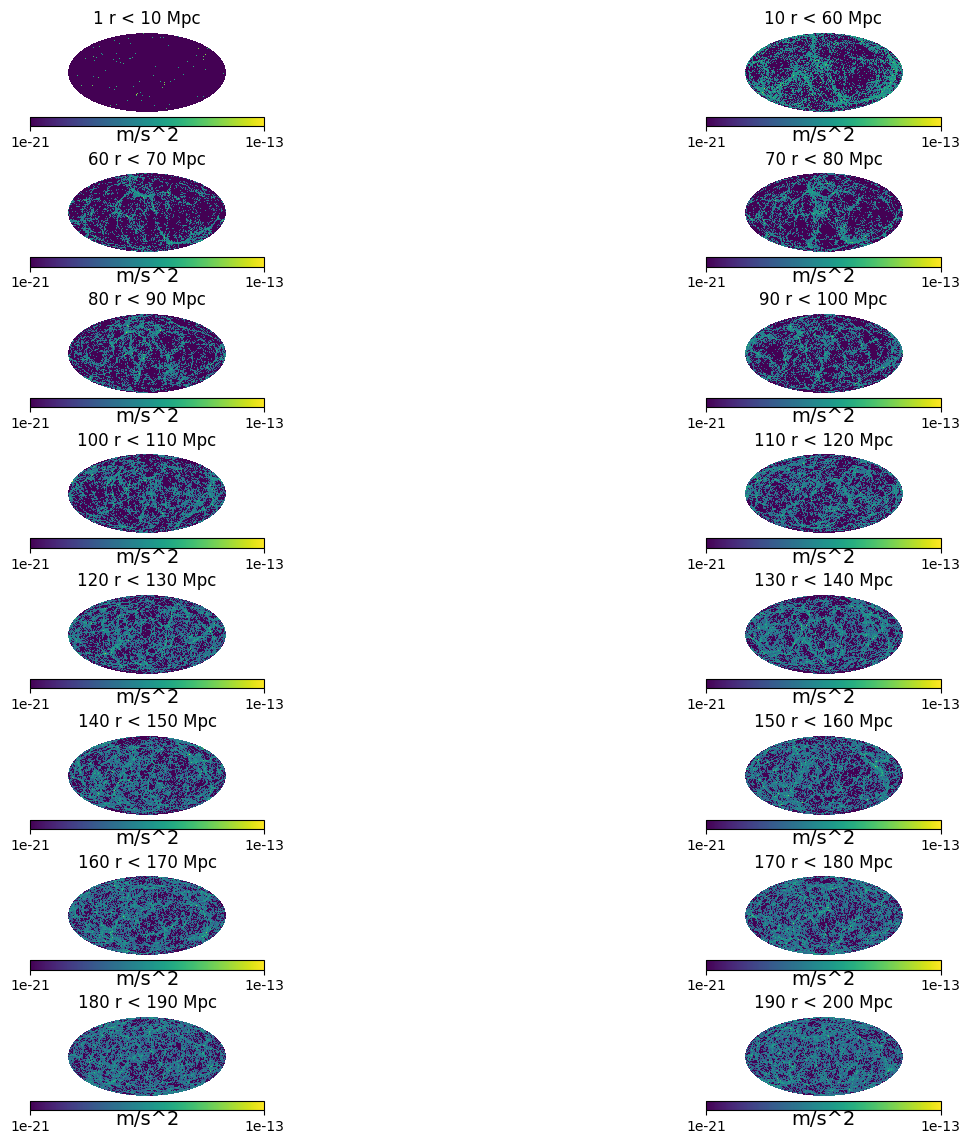

In [371]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec[k][:,2]*u.dimensionless_unscaled))
    counts[k],_=np.histogram(pix_indices[k],bins, weights=ac_scal[k])
    counts[k][counts[k]<=1e-21]=1e-21
    #max_idx[k]=argmax(counts[k])
    mean_val[k]=np.sum(counts[k])/bins
    st_dev[k]=np.sqrt(np.sum((counts[k]-mean_val[k])**2)/bins)
    plt.axes(axs[k])
    hp.mollview(counts[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title="{} r < {} Mpc".format(steps[k], steps[k+1]), unit='m/s^2', badcolor="white",hold=True)
    #plt.plot(mean_valnorm[k][0]*r, mean_valnorm[k][1]*r, color='r', marker='o')
plt.show()

    #print(counts[k])
    #print(pix_indices[k])

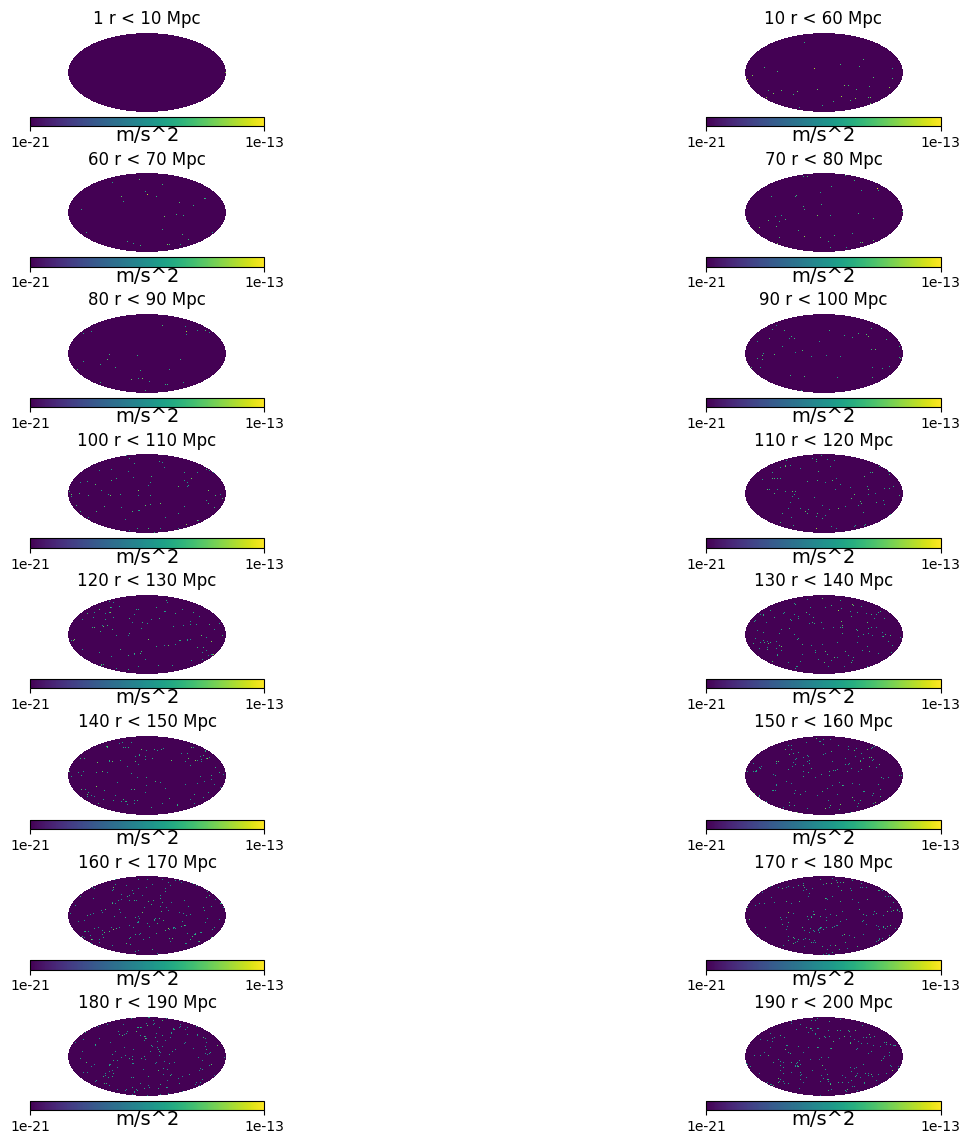

In [372]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices1t[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec1t[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec1t[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec1t[k][:,2]*u.dimensionless_unscaled))
    counts1t[k],_=np.histogram(pix_indices1t[k],bins, weights=ac_scal1t[k])
    counts1t[k][counts1t[k]<=1e-21]=1e-21
    #max_idx[k]=argmax(counts[k])
    mean_val1t[k]=np.sum(counts1t[k])/bins
    st_dev1t[k]=np.sqrt(np.sum((counts1t[k]-mean_val1t[k])**2)/bins)
    plt.axes(axs[k])
    hp.mollview(counts1t[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title="{} r < {} Mpc".format(steps[k], steps[k+1]), unit='m/s^2', badcolor="white",hold=True)
    #plt.plot(mean_valnorm[k][0]*r, mean_valnorm[k][1]*r, color='r', marker='o')
plt.show()

    #print(counts[k])
    #print(pix_indices[k])

In [373]:
#fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
#axs = axs.flatten()
#for k in range(m):
#    pix_indices2t[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec[k][:,0]*u.dimensionless_unscaled),
#        list(ac_vec[k][:,1]*u.dimensionless_unscaled),
#        list(ac_vec[k][:,2]*u.dimensionless_unscaled))
#    counts[k],_=np.histogram(pix_indices[k],bins, weights=ac_scal[k])
#    counts[k][counts[k]<=1e-21]=1e-21
#   #max_idx[k]=argmax(counts[k])
#    mean_val[k]=np.sum(counts[k])/bins
#    st_dev[k]=np.sqrt(np.sum((counts[k]-mean_val[k])**2)/bins)
#    plt.axes(axs[k])
#    hp.mollview(counts[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title='Acceleration Vectors', unit='m/s^2', badcolor="white",hold=True)
    #plt.plot(mean_valnorm[k][0]*r, mean_valnorm[k][1]*r, color='r', marker='o')
#plt.show()

    #print(counts[k])
    #print(pix_indices[k])

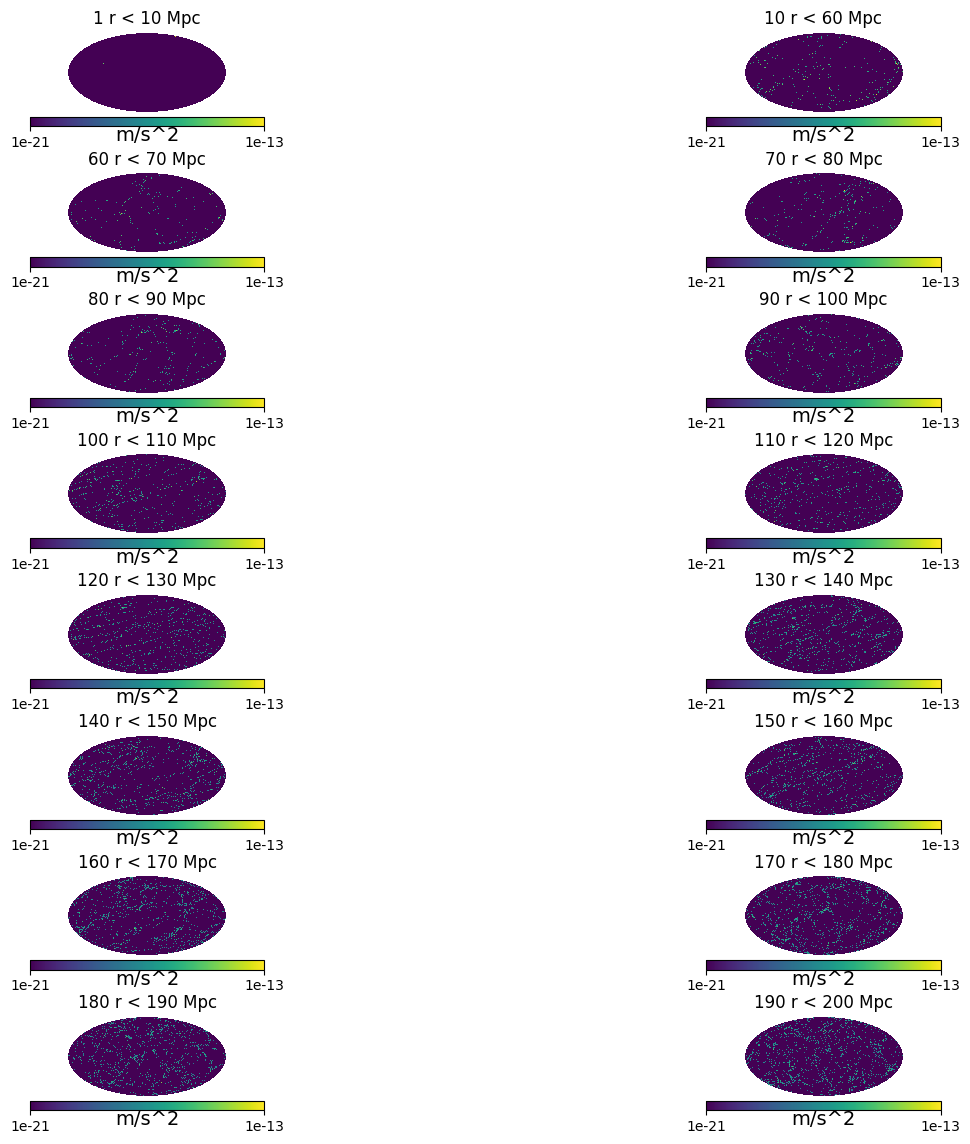

In [374]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices3t[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec3t[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec3t[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec3t[k][:,2]*u.dimensionless_unscaled))
    counts3t[k],_=np.histogram(pix_indices3t[k],bins, weights=ac_scal3t[k])
    counts3t[k][counts3t[k]<=1e-21]=1e-21
    #max_idx[k]=argmax(counts[k])
    mean_val3t[k]=np.sum(counts3t[k])/bins
    st_dev3t[k]=np.sqrt(np.sum((counts3t[k]-mean_val3t[k])**2)/bins)
    plt.axes(axs[k])
    hp.mollview(counts3t[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title="{} r < {} Mpc".format(steps[k], steps[k+1]), unit='m/s^2', badcolor="white",hold=True)
    #plt.plot(mean_valnorm[k][0]*r, mean_valnorm[k][1]*r, color='r', marker='o')
plt.show()

    #print(counts[k])
    #print(pix_indices[k])

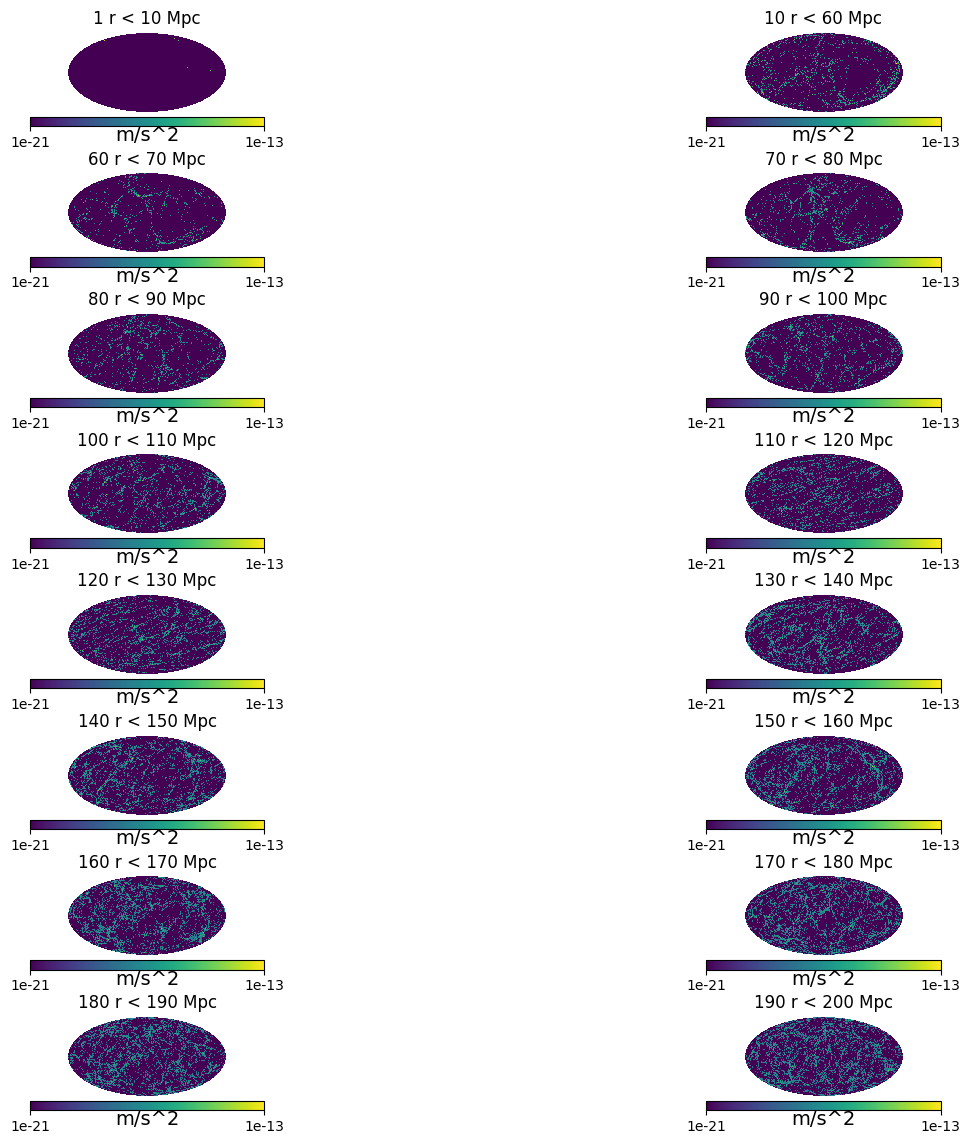

In [375]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices4t[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec4t[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec4t[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec4t[k][:,2]*u.dimensionless_unscaled))
    counts4t[k],_=np.histogram(pix_indices4t[k],bins, weights=ac_scal4t[k])
    counts4t[k][counts4t[k]<=1e-21]=1e-21
    #max_idx[k]=argmax(counts[k])
    mean_val4t[k]=np.sum(counts4t[k])/bins
    st_dev4t[k]=np.sqrt(np.sum((counts4t[k]-mean_val4t[k])**2)/bins)
    plt.axes(axs[k])
    hp.mollview(counts4t[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title="{} r < {} Mpc".format(steps[k], steps[k+1]), unit='m/s^2', badcolor="white",hold=True)
    #plt.plot(mean_valnorm[k][0]*r, mean_valnorm[k][1]*r, color='r', marker='o')
plt.show()

    #print(counts[k])
    #print(pix_indices[k])

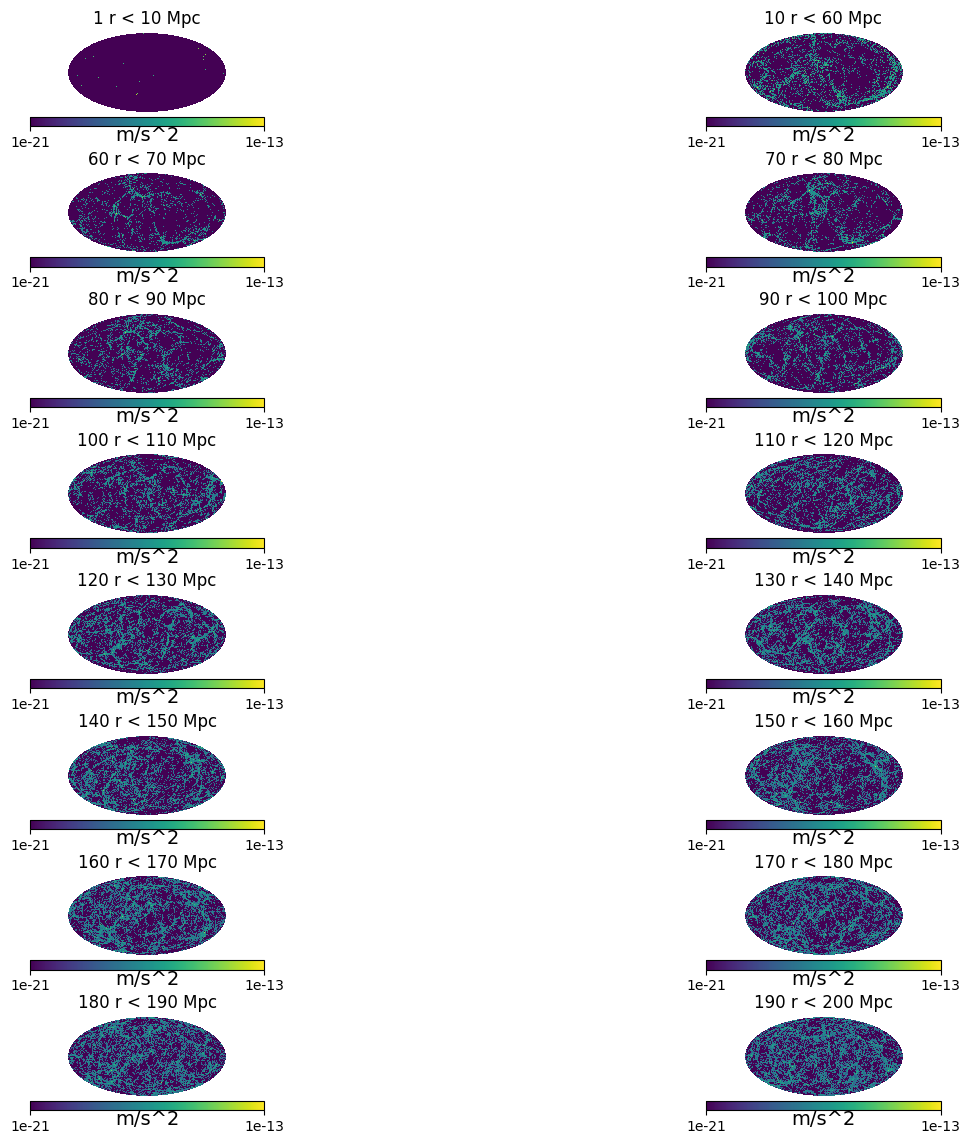

In [376]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices5t[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec5t[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec5t[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec5t[k][:,2]*u.dimensionless_unscaled))
    counts5t[k],_=np.histogram(pix_indices5t[k],bins, weights=ac_scal5t[k])
    counts5t[k][counts5t[k]<=1e-21]=1e-21
    #max_idx[k]=argmax(counts[k])
    mean_val5t[k]=np.sum(counts5t[k])/bins
    st_dev5t[k]=np.sqrt(np.sum((counts5t[k]-mean_val5t[k])**2)/bins)
    plt.axes(axs[k])
    hp.mollview(counts5t[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title="{} r < {} Mpc".format(steps[k], steps[k+1]), unit='m/s^2', badcolor="white",hold=True)
    #plt.plot(mean_valnorm[k][0]*r, mean_valnorm[k][1]*r, color='r', marker='o')
plt.show()

    #print(counts[k])
    #print(pix_indices[k])

In [377]:
#check
#mean_val[1]
np.sum((counts[1]-mean_val[1])**2)
print(np.amax(ac_vec[5]))

1.667634572777741e-15


In [378]:
# calculate pixel size:
pixel_size=4*3.14/(12*Nside3**2)
#in square degrees
print(pixel_size)

0.00025553385416666666


In [379]:
#Now let us calculate acceleration theoretically by omega matter
rho_matter= 2.8*10**(-27) #kg/m^3
steps2=np.array(steps1)
r=steps2*3.08*10**22
print(steps1)
r=np.array(r)
dr=10*3.08*10**22
m_shell=r**2*dr*pixel_size*rho_matter
acceleration=m_shell*G/(r**2)
print(m_shell*G)
print(r**2)
print(acceleration)
##we got that acceleration coinsides more or less than mean value 1-^-16

[10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[1.3943906441208334e+30 5.019806318835001e+31 6.832514156192084e+31
 8.924100122373334e+31 1.129456421737875e+32 1.3943906441208333e+32
 1.6872126793862088e+32 2.0079225275340005e+32 2.3565201885642087e+32
 2.7330056624768337e+32 3.137378949271874e+32 3.5696400489493334e+32
 4.029788961509209e+32 4.5178256869515e+32 5.03375022527621e+32
 5.577562576483333e+32]
[9.4864e+46 3.415104000000001e+48 4.6483360000000006e+48 6.071296e+48
 7.683984e+48 9.486400000000002e+48 1.1478544000000003e+49
 1.3660416000000004e+49 1.6032016000000005e+49 1.8593344000000002e+49
 2.1344399999999996e+49 2.4285184e+49 2.741569600000001e+49 3.0735936e+49
 3.424590400000001e+49 3.7945600000000007e+49]
[1.4698838802083333e-17 1.4698838802083333e-17 1.4698838802083333e-17
 1.4698838802083333e-17 1.4698838802083333e-17 1.469883880208333e-17
 1.4698838802083333e-17 1.4698838802083333e-17 1.469883880208333e-17
 1.4698838802083333e-17 1.4698838

In [380]:
# check
print(mean_val[1], counts[1])
print(np.sum((counts[1]-mean_val[1])**2))

2.2007021551924533e-17 [8.81114519e-18 1.17438475e-17 1.46196873e-17 ... 1.33736786e-17
 1.03531927e-18 1.68970281e-18]
1.6753260281604386e-26


In [381]:
# check
for k in range (m):
    st_dev[k]=np.sqrt(np.sum((counts[k]-mean_val[k])**2)/bins)
    #print (np.sqrt(np.sum((counts[k]-mean_val[k])**2)/bins))
print(st_dev)  

[2.69002933e-16 5.83820138e-16 1.06610577e-16 3.65474610e-16
 6.81165353e-17 3.67079235e-17 1.12481957e-16 4.79218528e-17
 5.71506471e-17 5.40063808e-17 7.80680869e-17 6.75948824e-17
 5.09206851e-17 4.00114782e-17 4.13265866e-17 2.91161533e-17]


In [382]:
print(st_dev[1])

5.838201375379929e-16


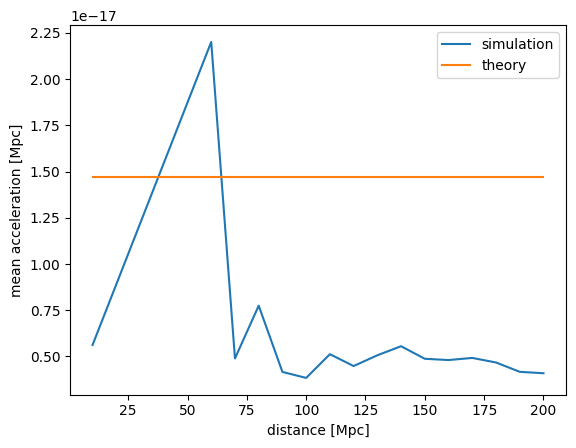

In [383]:
fig,ax=plt.subplots()
plt.plot(steps1, mean_val, label="simulation")
plt.plot(steps1, acceleration, label="theory")
plt.xlabel("distance [Mpc]")
plt.ylabel("mean acceleration [Mpc]")
plt.legend()

Text(0, 0.5, 'standard deviation')

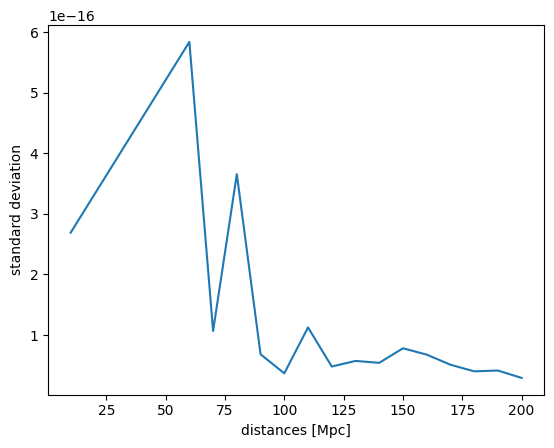

In [384]:
plt.plot(steps1, st_dev)
plt.xlabel("distances [Mpc]")
plt.ylabel("standard deviation")

In [385]:
#cumulative graphs and means

In [386]:
pix_indices2=[[]]*m
counts2=[[]]*m
max_idx2=np.zeros(m)
for i in range(m):
    pix_indices2[i]=np.zeros(j[i])
    counts2[i]=np.zeros(bins)

In [387]:
pix_indices21t=[[]]*m
counts21t=[[]]*m
max_idx21t=np.zeros(m)
for i in range(m):
    pix_indices21t[i]=np.zeros(j1t[i])
    counts21t[i]=np.zeros(bins)

In [388]:
#pix_indices22t=[[]]*m
#counts22t=[[]]*m
#max_idx22t=np.zeros(m)
#for i in range(m):
#    pix_indices22t[i]=np.zeros(j2t[i])
#    counts22t[i]=np.zeros(bins)

In [389]:
pix_indices23t=[[]]*m
counts23t=[[]]*m
max_idx23t=np.zeros(m)
for i in range(m):
    pix_indices23t[i]=np.zeros(j3t[i])
    counts23t[i]=np.zeros(bins)

In [390]:
pix_indices24t=[[]]*m
counts24t=[[]]*m
max_idx24t=np.zeros(m)
for i in range(m):
    pix_indices24t[i]=np.zeros(j4t[i])
    counts24t[i]=np.zeros(bins)

In [391]:
pix_indices25t=[[]]*m
counts25t=[[]]*m
max_idx25t=np.zeros(m)
for i in range(m):
    pix_indices25t[i]=np.zeros(j5t[i])
    counts25t[i]=np.zeros(bins)

In [392]:
ac_vec2=[[]]*m
ac_scal2=[[]]*m
s=0
for i in range(m):
    s+=j[i]
    ac_vec2[i]=np.zeros((s,3))
    ac_scal2[i]=np.zeros(s)

In [393]:
ac_vec21t=[[]]*m
ac_scal21t=[[]]*m
s1t=0
for i in range(m):
    s1t+=j1t[i]
    ac_vec21t[i]=np.zeros((s1t,3))
    ac_scal21t[i]=np.zeros(s1t)

In [394]:
#ac_vec22t=[[]]*m
#ac_scal2=[[]]*m
#s=0
#for i in range(m):
#    s+=j[i]
#    ac_vec2[i]=np.zeros((s,3))
#    ac_scal2[i]=np.zeros(s)

In [395]:
ac_vec23t=[[]]*m
ac_scal23t=[[]]*m
s3t=0
for i in range(m):
    s3t+=j3t[i]
    ac_vec23t[i]=np.zeros((s3t,3))
    ac_scal23t[i]=np.zeros(s3t)

In [396]:
ac_vec24t=[[]]*m
ac_scal24t=[[]]*m
s4t=0
for i in range(m):
    s4t+=j4t[i]
    ac_vec24t[i]=np.zeros((s4t,3))
    ac_scal24t[i]=np.zeros(s4t)

In [397]:
ac_vec25t=[[]]*m
ac_scal25t=[[]]*m
s5t=0
for i in range(m):
    s5t+=j5t[i]
    ac_vec25t[i]=np.zeros((s5t,3))
    ac_scal25t[i]=np.zeros(s5t)

In [398]:
i=start
for k in range(1,m+1):
    p=0
    i=start
    while dist[i]  < steps[k]:
        ac_vec2[k-1][p]=(G*m_halo[i]*scale/dist[i]**3)*dist_vec[i] #in m/s^2
        i+=1
        p+=1
        ac_scal2[k-1][p-1]=np.linalg.norm(ac_vec2[k-1][p-1])
        if i>s3-1:
            break

In [399]:
i=start1t
for k in range(1,m+1):
    p=0
    i=start1t
    while dist1t[i]  < steps[k]:
        ac_vec21t[k-1][p]=(G*m_halo1t[i]*scale/dist1t[i]**3)*dist_vec1t[i] #in m/s^2
        i+=1
        p+=1
        ac_scal21t[k-1][p-1]=np.linalg.norm(ac_vec21t[k-1][p-1])
        if i>s1t-1:
            break

In [400]:
#i=start2t
#for k in range(1,m+1):
#    p=0
#    i=start
#    while dist[i]  < steps[k]:
#        ac_vec2[k-1][p]=(G*m_halo[i]*scale/dist[i]**3)*dist_vec[i] #in m/s^2
#        i+=1
#       p+=1
#        ac_scal2[k-1][p-1]=np.linalg.norm(ac_vec2[k-1][p-1])
#        if i>s3-1:
#            break

In [401]:
i=start3t
for k in range(1,m+1):
    p=0
    i=start3t
    while dist3t[i]  < steps[k]:
        ac_vec23t[k-1][p]=(G*m_halo3t[i]*scale/dist3t[i]**3)*dist_vec3t[i] #in m/s^2
        i+=1
        p+=1
        ac_scal23t[k-1][p-1]=np.linalg.norm(ac_vec23t[k-1][p-1])
        if i>s3t-1:
            break

In [402]:
i=start4t
for k in range(1,m+1):
    p=0
    i=start4t
    while dist4t[i]  < steps[k]:
        ac_vec24t[k-1][p]=(G*m_halo4t[i]*scale/dist4t[i]**3)*dist_vec4t[i] #in m/s^2
        i+=1
        p+=1
        ac_scal24t[k-1][p-1]=np.linalg.norm(ac_vec24t[k-1][p-1])
        if i>s4t-1:
            break

In [403]:
i=start5t
for k in range(1,m+1):
    p=0
    i=start5t
    while dist5t[i]  < steps[k]:
        ac_vec25t[k-1][p]=(G*m_halo5t[i]*scale/dist5t[i]**3)*dist_vec5t[i] #in m/s^2
        i+=1
        p+=1
        ac_scal25t[k-1][p-1]=np.linalg.norm(ac_vec25t[k-1][p-1])
        if i>s5t-1:
            break

In [404]:
mean_val2=np.zeros(m)
st_dev2=np.zeros(m)

In [405]:
mean_val21t=np.zeros(m)
st_dev21t=np.zeros(m)

In [406]:
#mean_val22t=np.zeros(m)
#st_dev22t=np.zeros(m)

In [407]:
mean_val23t=np.zeros(m)
st_dev23t=np.zeros(m)

In [408]:
mean_val24t=np.zeros(m)
st_dev24t=np.zeros(m)

In [409]:
mean_val25t=np.zeros(m)
st_dev25t=np.zeros(m)

In [410]:
mean_val2=np.zeros((m,3))
mean_valnorm2=np.zeros((m,3))
mean_scal2=np.zeros(m)
for i in range(m):
    mean_val2[i]=(sum(ac_vec2[i]))/j[i]
    #print(mean_valnorm[i])

In [411]:
mean_val21t=np.zeros((m,3))
mean_valnorm21t=np.zeros((m,3))
mean_scal21t=np.zeros(m)
for i in range(m):
    mean_val21t[i]=(sum(ac_vec21t[i]))/j1t[i]
    #print(mean_valnorm[i])

In [412]:
#mean_val22t=np.zeros((m,3))
#mean_valnorm2=np.zeros((m,3))
#mean_scal2=np.zeros(m)
#for i in range(m):
#    mean_val2[i]=(sum(ac_vec2[i]))/j[i]
    #print(mean_valnorm[i])

In [413]:
mean_val23t=np.zeros((m,3))
mean_valnorm23t=np.zeros((m,3))
mean_scal23t=np.zeros(m)
for i in range(m):
    mean_val23t[i]=(sum(ac_vec23t[i]))/j3t[i]
    #print(mean_valnorm[i])

In [414]:
mean_val24t=np.zeros((m,3))
mean_valnorm24t=np.zeros((m,3))
mean_scal24t=np.zeros(m)
for i in range(m):
    mean_val24t[i]=(sum(ac_vec24t[i]))/j4t[i]
    #print(mean_valnorm[i])

In [415]:
mean_val25t=np.zeros((m,3))
mean_valnorm25t=np.zeros((m,3))
mean_scal25t=np.zeros(m)
for i in range(m):
    mean_val25t[i]=(sum(ac_vec25t[i]))/j5t[i]
    #print(mean_valnorm[i])

In [416]:
print(sum(ac_vec2[1]))

[-2.09689765e-13  6.06109018e-14 -2.67099358e-14]


In [417]:
x=np.zeros(m);  ra=np.zeros(m)
y=np.zeros(m);  dec=np.zeros(m)
z=np.zeros(m);  phi=np.zeros(m);  phi_pix=np.zeros(m)
norm=np.zeros(m); theta=np.zeros(m); theta_pix=np.zeros(m)
ipix=np.zeros(m, dtype=int)

In [418]:
ra1t=np.zeros(m)
dec1t=np.zeros(m)
phi1t=np.zeros(m);
theta1t=np.zeros(m);

In [419]:
#ra2t=np.zeros(m)
#dec1t=np.zeros(m)
#phi1t=np.zeros(m);
#theta1t=np.zeros(m);

In [420]:
ra3t=np.zeros(m)
dec3t=np.zeros(m)
phi3t=np.zeros(m);
theta3t=np.zeros(m);

In [421]:
ra4t=np.zeros(m)
dec4t=np.zeros(m)
phi4t=np.zeros(m);
theta4t=np.zeros(m);

In [422]:
ra5t=np.zeros(m)
dec5t=np.zeros(m)
phi5t=np.zeros(m);
theta5t=np.zeros(m);

In [423]:
a=np.zeros(m, dtype=np.ndarray)
print(type(a[1]))

<class 'int'>


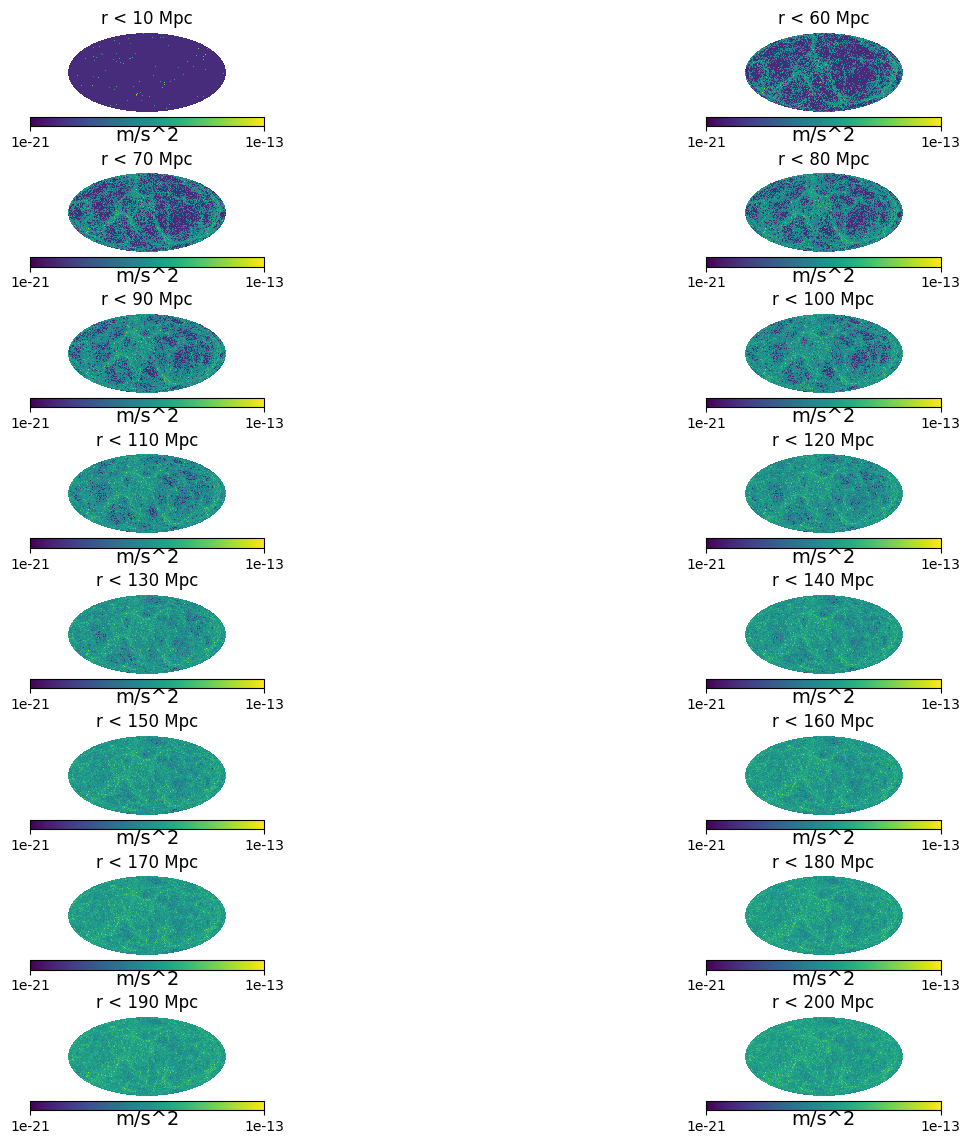

In [424]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices2[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec2[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec2[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec2[k][:,2]*u.dimensionless_unscaled))
    counts2[k],_=np.histogram(pix_indices2[k],bins, weights=ac_scal2[k])
    counts2[k][counts2[k]<=1e-20]=1e-20
    #max_idx[k]=argmax(counts[k])
    plt.axes(axs[k])
    ax=axs[k]
    hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("r < {} Mpc".format(steps[k+1])),unit='m/s^2', badcolor="white", sub=(1,k,k), hold=True)
    dec[k] = np.arctan(mean_val2[k][2]/(np.sqrt(mean_val2[k][0]**2+mean_val2[k][1]**2)))
    ra[k]=np.arctan(mean_val2[k][1]/mean_val2[k][0])
    theta[k] = np.pi/2.0 - dec[k]
    phi[k] = ra[k]
    #ipix[k] = hp.ang2pix(Nside3, theta[k], phi[k])

# Convert ipix to (theta, phi) coordinates
    #theta_pix[k], phi_pix[k] = hp.pix2ang(Nside3, ipix[k], nest=False)

    #hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13 ,unit='m/s^2', badcolor="white",hold=True)
    #hp.visufunc.projscatter(phi[k], theta[k], color='red', s=10)
    #print(k)
    
    #hp.projscatter(ipix[k], lonra=ra[k]*180.0/np.pi, latdec=dec[k]*180/np.pi, c='o', color='red', s=10)
plt.show()

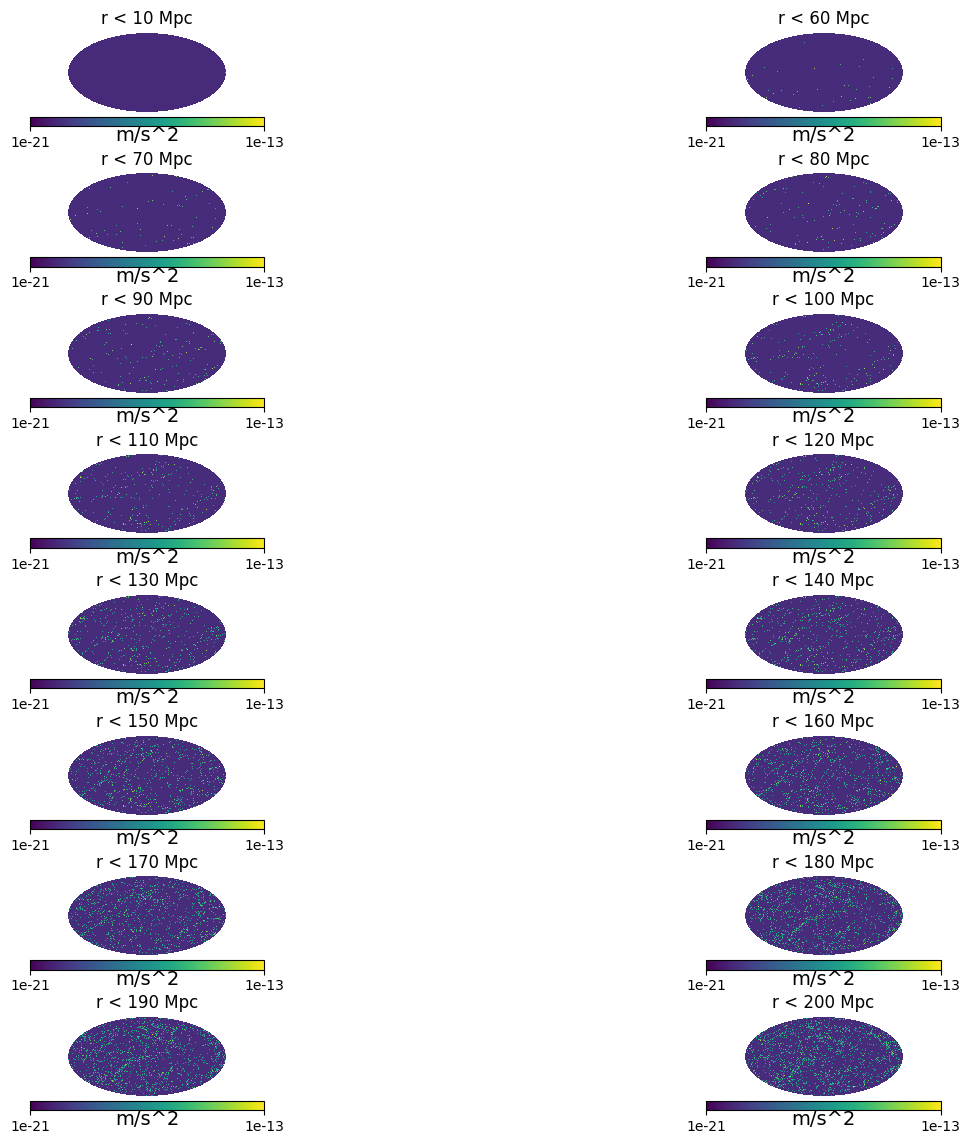

In [425]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices21t[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec21t[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec21t[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec21t[k][:,2]*u.dimensionless_unscaled))
    counts21t[k],_=np.histogram(pix_indices21t[k],bins, weights=ac_scal21t[k])
    counts21t[k][counts21t[k]<=1e-20]=1e-20
    #max_idx[k]=argmax(counts[k])
    plt.axes(axs[k])
    ax=axs[k]
    hp.mollview(counts21t[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("r < {} Mpc".format(steps[k+1])),unit='m/s^2', badcolor="white", sub=(1,k,k), hold=True)
    dec1t[k] = np.arctan(mean_val21t[k][2]/(np.sqrt(mean_val21t[k][0]**2+mean_val21t[k][1]**2)))
    ra1t[k]=np.arctan(mean_val21t[k][1]/mean_val21t[k][0])
    theta1t[k] = np.pi/2.0 - dec1t[k]
    phi1t[k] = ra1t[k]
    #ipix[k] = hp.ang2pix(Nside3, theta[k], phi[k])

# Convert ipix to (theta, phi) coordinates
    #theta_pix[k], phi_pix[k] = hp.pix2ang(Nside3, ipix[k], nest=False)

    #hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13 ,unit='m/s^2', badcolor="white",hold=True)
    #hp.visufunc.projscatter(phi[k], theta[k], color='red', s=10)
    #print(k)
    
    #hp.projscatter(ipix[k], lonra=ra[k]*180.0/np.pi, latdec=dec[k]*180/np.pi, c='o', color='red', s=10)
plt.show()

In [426]:
#fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
#axs = axs.flatten()
#for k in range(m):
#   pix_indices22t[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec2[k][:,0]*u.dimensionless_unscaled),
#        list(ac_vec2[k][:,1]*u.dimensionless_unscaled),
#        list(ac_vec2[k][:,2]*u.dimensionless_unscaled))
#    counts2[k],_=np.histogram(pix_indices2[k],bins, weights=ac_scal2[k])
#    counts2[k][counts2[k]<=1e-20]=1e-20
#    #max_idx[k]=argmax(counts[k])
#    plt.axes(axs[k])
#    ax=axs[k]
#    hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("r < {} Mpc".format(steps[k+1])),unit='m/s^2', badcolor="white", sub=(1,k,k), hold=True)
#    dec[k] = np.arctan(mean_val2[k][2]/(np.sqrt(mean_val2[k][0]**2+mean_val2[k][1]**2)))
#    ra[k]=np.arctan(mean_val2[k][1]/mean_val2[k][0])
#    theta[k] = np.pi/2.0 - dec[k]
#    phi[k] = ra[k]
    #ipix[k] = hp.ang2pix(Nside3, theta[k], phi[k])

# Convert ipix to (theta, phi) coordinates
    #theta_pix[k], phi_pix[k] = hp.pix2ang(Nside3, ipix[k], nest=False)

    #hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13 ,unit='m/s^2', badcolor="white",hold=True)
    #hp.visufunc.projscatter(phi[k], theta[k], color='red', s=10)
    #print(k)
    
    #hp.projscatter(ipix[k], lonra=ra[k]*180.0/np.pi, latdec=dec[k]*180/np.pi, c='o', color='red', s=10)
#plt.show()

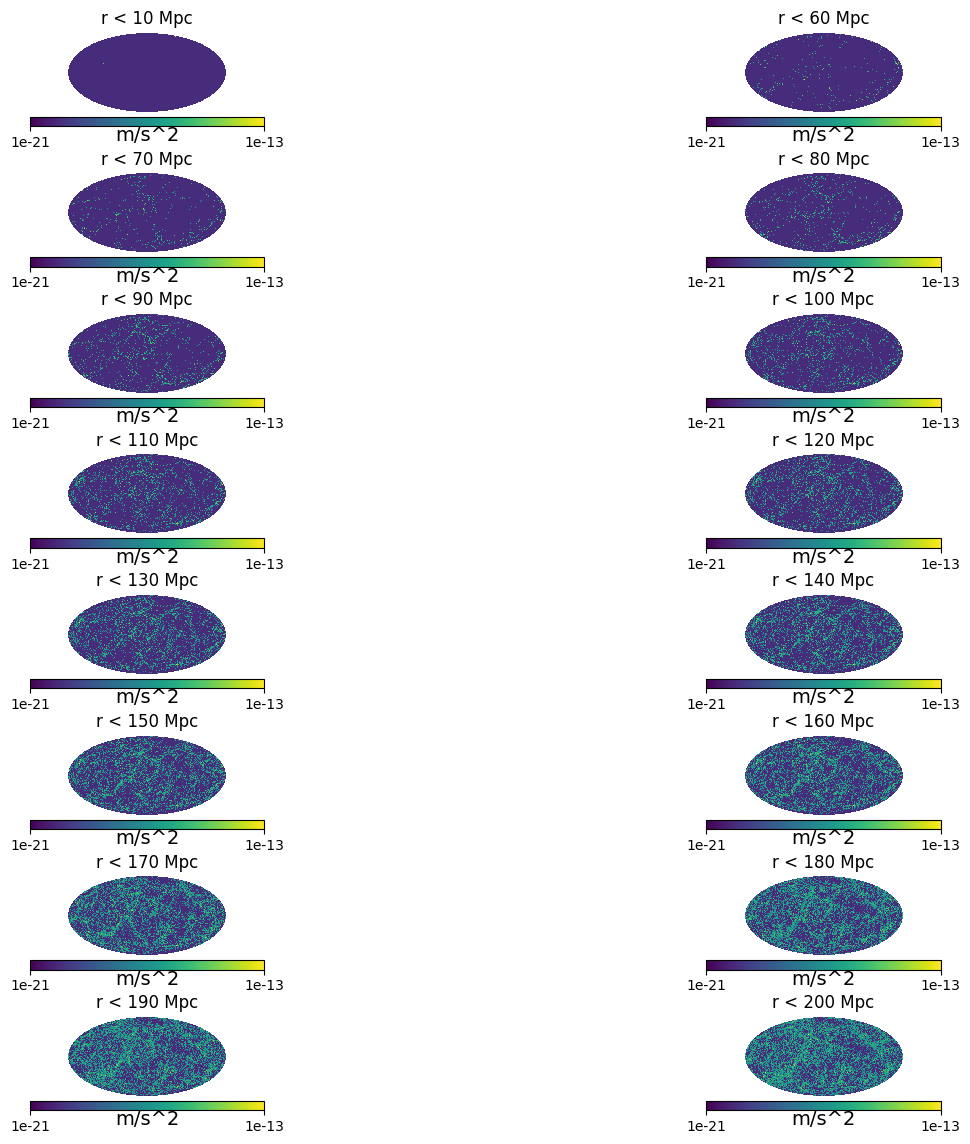

In [427]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices23t[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec23t[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec23t[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec23t[k][:,2]*u.dimensionless_unscaled))
    counts23t[k],_=np.histogram(pix_indices23t[k],bins, weights=ac_scal23t[k])
    counts23t[k][counts23t[k]<=1e-20]=1e-20
    #max_idx[k]=argmax(counts[k])
    plt.axes(axs[k])
    ax=axs[k]
    hp.mollview(counts23t[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("r < {} Mpc".format(steps[k+1])),unit='m/s^2', badcolor="white", sub=(1,k,k), hold=True)
    dec3t[k] = np.arctan(mean_val23t[k][2]/(np.sqrt(mean_val23t[k][0]**2+mean_val23t[k][1]**2)))
    ra3t[k]=np.arctan(mean_val23t[k][1]/mean_val23t[k][0])
    theta3t[k] = np.pi/2.0 - dec3t[k]
    phi3t[k] = ra3t[k]
    #ipix[k] = hp.ang2pix(Nside3, theta[k], phi[k])

# Convert ipix to (theta, phi) coordinates
    #theta_pix[k], phi_pix[k] = hp.pix2ang(Nside3, ipix[k], nest=False)

    #hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13 ,unit='m/s^2', badcolor="white",hold=True)
    #hp.visufunc.projscatter(phi[k], theta[k], color='red', s=10)
    #print(k)
    
    #hp.projscatter(ipix[k], lonra=ra[k]*180.0/np.pi, latdec=dec[k]*180/np.pi, c='o', color='red', s=10)
plt.show()

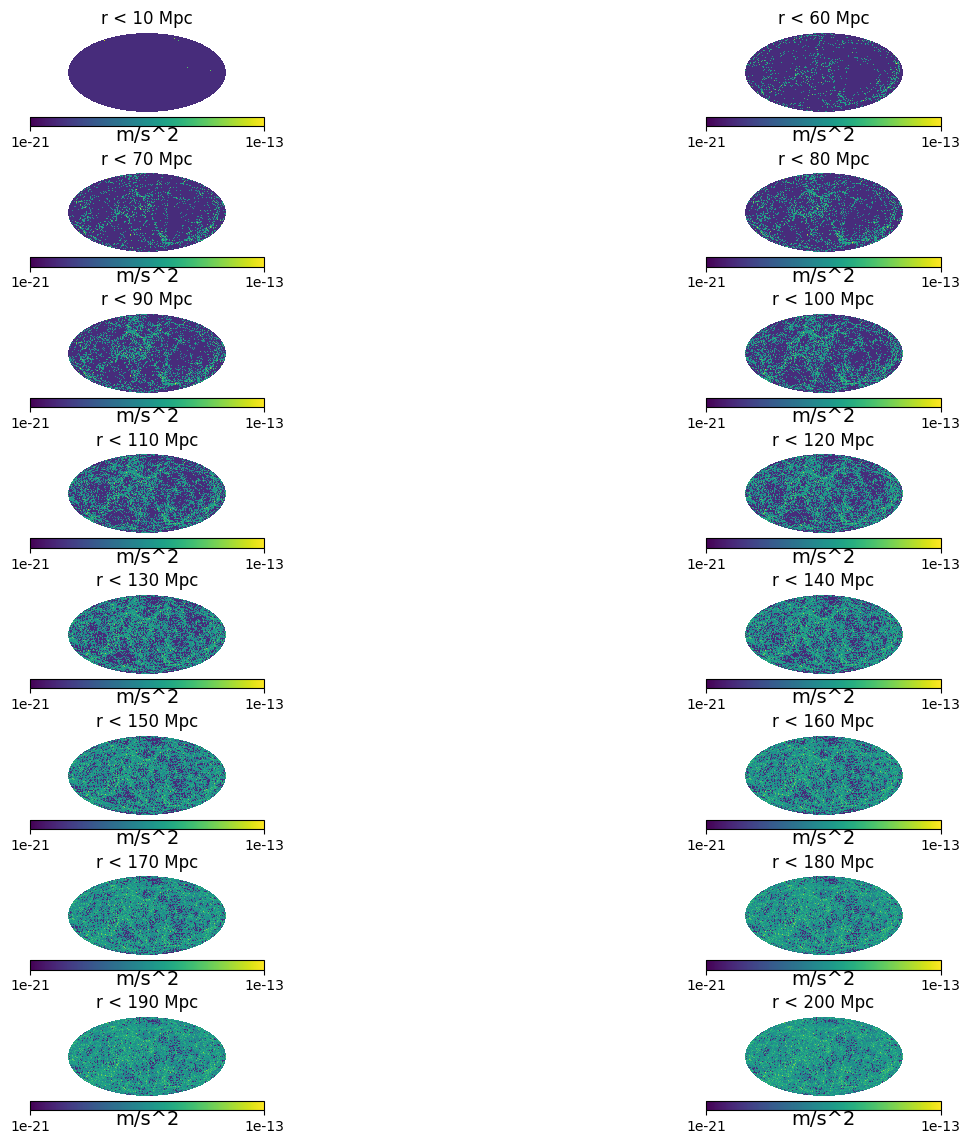

In [428]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices24t[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec24t[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec24t[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec24t[k][:,2]*u.dimensionless_unscaled))
    counts24t[k],_=np.histogram(pix_indices24t[k],bins, weights=ac_scal24t[k])
    counts24t[k][counts24t[k]<=1e-20]=1e-20
    #max_idx[k]=argmax(counts[k])
    plt.axes(axs[k])
    ax=axs[k]
    hp.mollview(counts24t[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("r < {} Mpc".format(steps[k+1])),unit='m/s^2', badcolor="white", sub=(1,k,k), hold=True)
    dec4t[k] = np.arctan(mean_val24t[k][2]/(np.sqrt(mean_val24t[k][0]**2+mean_val24t[k][1]**2)))
    ra4t[k]=np.arctan(mean_val24t[k][1]/mean_val24t[k][0])
    theta4t[k] = np.pi/2.0 - dec4t[k]
    phi4t[k] = ra4t[k]
    #ipix[k] = hp.ang2pix(Nside3, theta[k], phi[k])

# Convert ipix to (theta, phi) coordinates
    #theta_pix[k], phi_pix[k] = hp.pix2ang(Nside3, ipix[k], nest=False)

    #hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13 ,unit='m/s^2', badcolor="white",hold=True)
    #hp.visufunc.projscatter(phi[k], theta[k], color='red', s=10)
    #print(k)
    
    #hp.projscatter(ipix[k], lonra=ra[k]*180.0/np.pi, latdec=dec[k]*180/np.pi, c='o', color='red', s=10)
plt.show()

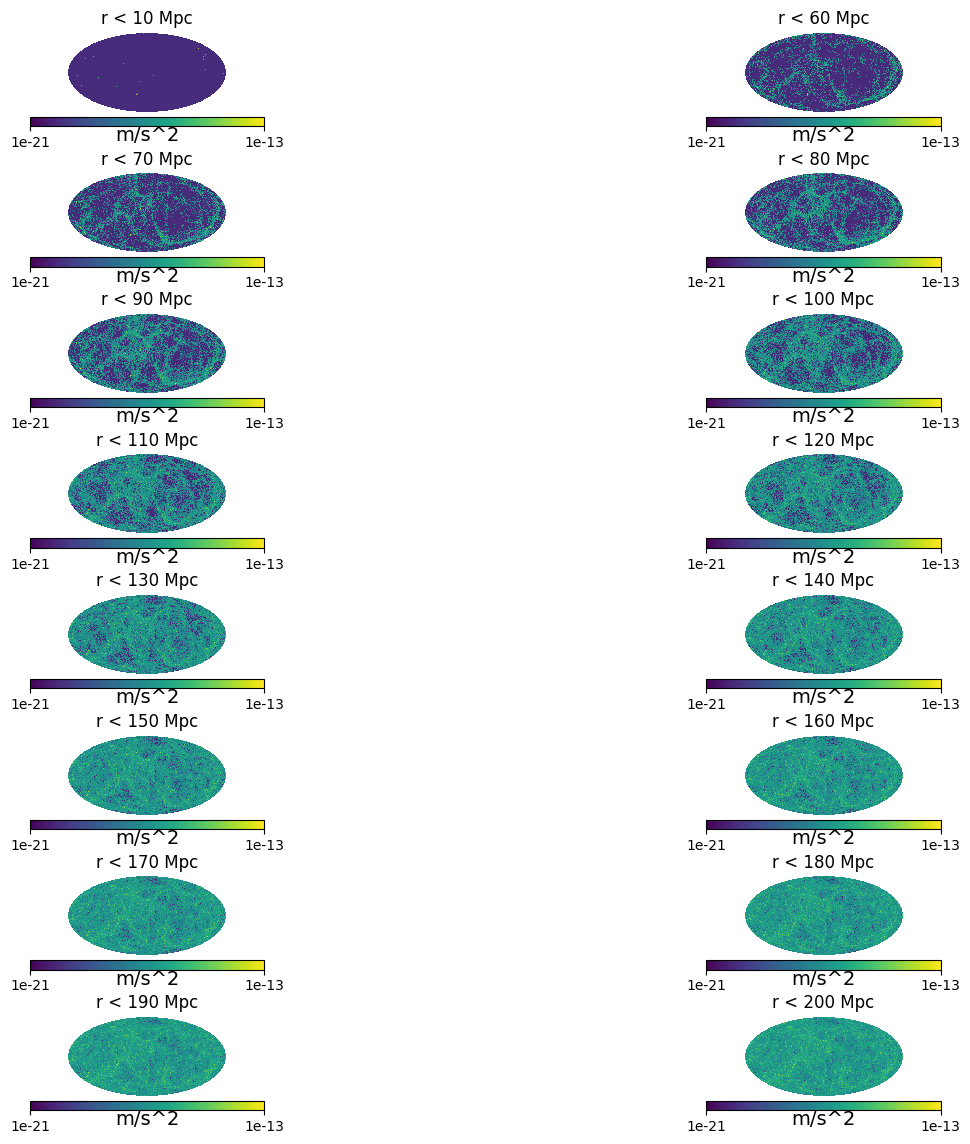

In [429]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices25t[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec25t[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec25t[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec25t[k][:,2]*u.dimensionless_unscaled))
    counts25t[k],_=np.histogram(pix_indices25t[k],bins, weights=ac_scal25t[k])
    counts25t[k][counts25t[k]<=1e-20]=1e-20
    #max_idx[k]=argmax(counts[k])
    plt.axes(axs[k])
    ax=axs[k]
    hp.mollview(counts25t[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("r < {} Mpc".format(steps[k+1])),unit='m/s^2', badcolor="white", sub=(1,k,k), hold=True)
    dec5t[k] = np.arctan(mean_val25t[k][2]/(np.sqrt(mean_val25t[k][0]**2+mean_val25t[k][1]**2)))
    ra5t[k]=np.arctan(mean_val25t[k][1]/mean_val25t[k][0])
    theta5t[k] = np.pi/2.0 - dec5t[k]
    phi5t[k] = ra5t[k]
    #ipix[k] = hp.ang2pix(Nside3, theta[k], phi[k])

# Convert ipix to (theta, phi) coordinates
    #theta_pix[k], phi_pix[k] = hp.pix2ang(Nside3, ipix[k], nest=False)

    #hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13 ,unit='m/s^2', badcolor="white",hold=True)
    #hp.visufunc.projscatter(phi[k], theta[k], color='red', s=10)
    #print(k)
    
    #hp.projscatter(ipix[k], lonra=ra[k]*180.0/np.pi, latdec=dec[k]*180/np.pi, c='o', color='red', s=10)
plt.show()

In [430]:
#check
nside = 16

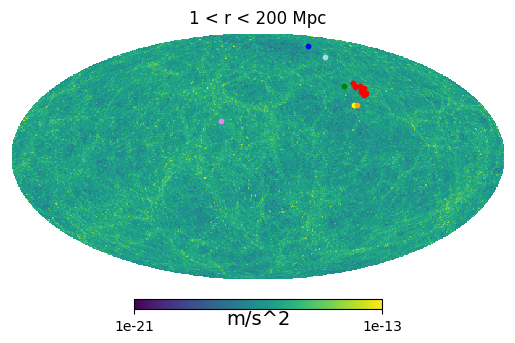

In [464]:
#mean acceleration direction

hp.mollview(counts2[15], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{} < r < {} Mpc".format(steps[0],steps[k+1])),unit='m/s^2', badcolor="white",hold=True)
hp.visufunc.projscatter(phi[0], theta[0], color='violet', s=10)
hp.visufunc.projscatter(phi[1], theta[1], color='blue', s=10)
hp.visufunc.projscatter(phi[2], theta[2], color='lightblue', s=10)
hp.visufunc.projscatter(phi[3], theta[3], color='green', s=10)
hp.visufunc.projscatter(phi[4], theta[4], color='yellow', s=10)
hp.visufunc.projscatter(phi[5], theta[5], color='orange', s=10)
hp.visufunc.projscatter(phi[6], theta[6], color='red', s=10)
hp.visufunc.projscatter(phi[7], theta[7], color='red', s=10)
hp.visufunc.projscatter(phi[8], theta[8], color='red', s=10)
hp.visufunc.projscatter(phi[9], theta[9], color='red', s=10)
hp.visufunc.projscatter(phi[10], theta[10], color='red', s=10)
hp.visufunc.projscatter(phi[11], theta[11], color='red', s=10)
hp.visufunc.projscatter(phi[12], theta[12], color='red', s=10)
hp.visufunc.projscatter(phi[13], theta[13], color='red', s=10)
hp.visufunc.projscatter(phi[14], theta[14], color='red', s=10)
hp.visufunc.projscatter(phi[15], theta[15], color='red', s=10)

In [432]:
# plotting summed acceleration vecor for different mass constraints

[array([1.02963426e-16, 1.00000000e-20, 1.00000000e-20, ...,
       1.00000000e-20, 1.00000000e-20, 1.44643053e-14]), array([8.81114519e-18, 1.17438475e-17, 1.46196873e-17, ...,
       1.33736786e-17, 1.03531927e-18, 1.68970281e-18]), array([2.87198282e-17, 2.60725937e-17, 1.60179399e-17, ...,
       2.30994943e-18, 1.00000000e-20, 6.79199831e-19]), array([2.87198282e-17, 2.60725937e-17, 1.60179399e-17, ...,
       2.30994943e-18, 4.62252268e-19, 1.09677660e-18]), array([3.58091730e-17, 2.69087042e-17, 1.60179399e-17, ...,
       2.30994943e-18, 6.80578968e-19, 1.09677660e-18]), array([4.53803003e-17, 2.97649421e-17, 2.48161953e-17, ...,
       4.02070757e-18, 1.18125597e-18, 5.50878846e-18]), array([4.55953820e-17, 3.21918927e-17, 2.53028387e-17, ...,
       4.02070757e-18, 1.18125597e-18, 5.50878846e-18]), array([4.55953820e-17, 3.21918927e-17, 2.53028387e-17, ...,
       4.02070757e-18, 1.18125597e-18, 6.79284670e-18]), array([4.55953820e-17, 3.21918927e-17, 2.53028387e-17, ...,
   

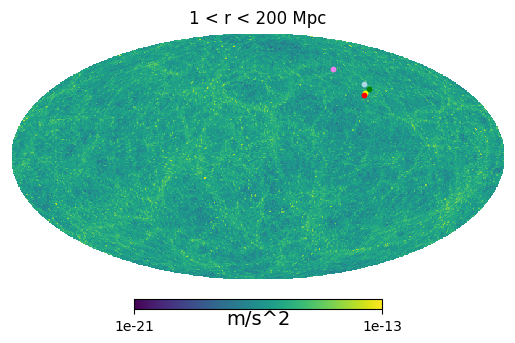

In [465]:
#mean acceleration direction
print(counts2)
hp.mollview(counts2[15], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{} < r < {} Mpc".format(steps[0],steps[k+1])),unit='m/s^2', badcolor="white",hold=True)
hp.visufunc.projscatter(phi1t[15], theta1t[15], color='violet', s=10)
#hp.visufunc.projscatter(phi2t[1], theta[1], color='blue', s=10)
hp.visufunc.projscatter(phi3t[15], theta3t[15], color='lightblue', s=10)
hp.visufunc.projscatter(phi4t[15], theta4t[15], color='green', s=10)
hp.visufunc.projscatter(phi5t[15], theta5t[15], color='yellow', s=10)
hp.visufunc.projscatter(phi[15], theta[15], color='red', s=10)

Text(0, 0.5, 'angular difference')

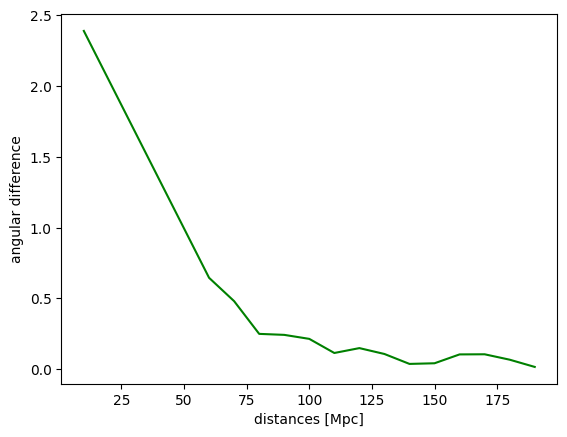

In [435]:
# plot x - distance, y - distance to last acceleration point
diff=np.zeros(m-1)
for i in range(m-1):
    diff[i]=np.sqrt((theta[m-1]-theta[i])**2+(phi[m-1]-phi[i])**2)
#print (diff)
steps2=steps1[:-1]
#print(steps1)
#print(steps2)
plt.plot(steps2, diff, "g")
plt.xlabel("distances [Mpc]")
plt.ylabel("angular difference")

In [438]:
diff2=np.zeros(4)
diff2[0]=np.sqrt((theta1t[15]-theta[15])**2+(phi1t[15]-phi[15])**2)
diff2[1]=np.sqrt((theta3t[15]-theta[15])**2+(phi3t[15]-phi[15])**2)
diff2[2]=np.sqrt((theta4t[15]-theta[15])**2+(phi4t[15]-phi[15])**2)
diff2[3]=np.sqrt((theta5t[15]-theta[15])**2+(phi5t[15]-phi[15])**2)
M=[10**11, 10**10, 10**9, 10**8]

[0.36761567 0.16436096 0.14016195 0.02769585]


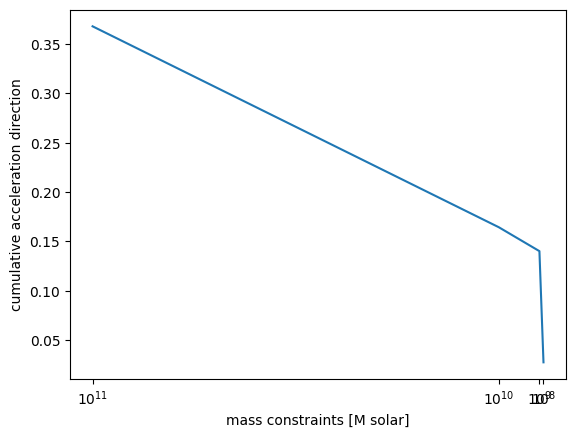

In [466]:
fig, ax=plt.subplots()
xticks=[10**11, 10**10, 10**9, 10**8]
plt.plot(M, diff2)
ax.set_xticks(M)
xticklabels=['10$^{11}$', '10$^{10}$', '10$^{9}$', '10$^{8}$']
ax.set_xticklabels(xticklabels)
ax.invert_xaxis()
plt.xlabel('mass constraints [M solar]')
plt.ylabel('cumulative acceleration direction')
print(diff2)

[0.36761567 0.16436096 0.14016195 0.02769585]


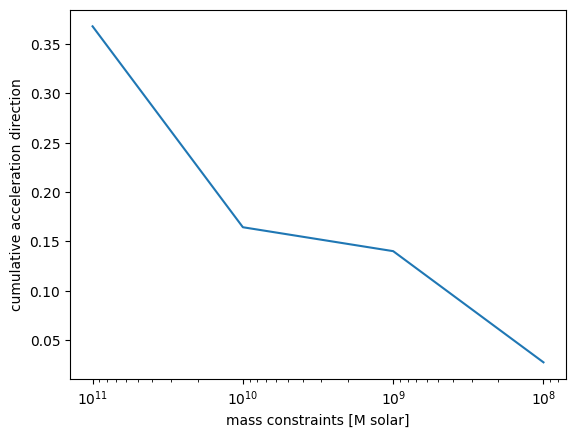

In [467]:
fig, ax=plt.subplots()
xticks=[10**11, 10**10, 10**9, 10**8]
plt.plot(M, diff2)
ax.set_xticks(M)
xticklabels=['10$^{11}$', '10$^{10}$', '10$^{9}$', '10$^{8}$']
ax.set_xticklabels(xticklabels)
ax.invert_xaxis()
plt.xlabel('mass constraints [M solar]')
plt.ylabel('cumulative acceleration direction')
plt.xscale("log")
print(diff2)

In [277]:
# now we will plot velocity vector and acceleration vector for r<10 Mpc because in paper velocity is in that shell given
# observation: l=271+=2 degree, b=29+- 1 deg
#SD: l=232 deg, b=7 deg
# b -dec, l - ra

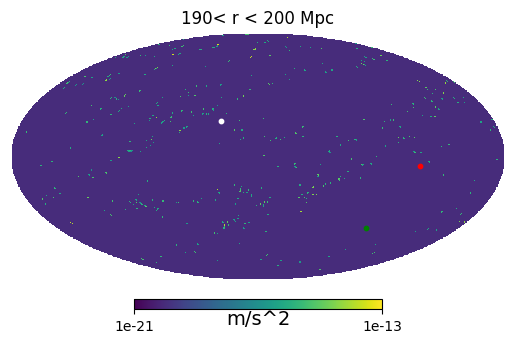

In [205]:
b_vel_obs=29*0.017
l_vel_obs=271*0.017
b_vel_sim=7*0.017
l_vel_sim=232*0.017
theta_vel_obs=np.pi/2.0-b_vel_obs
phi_vel_obs=l_vel_obs
theta_vel_sim=np.pi/2.0-b_vel_sim
phi_vel_sim=l_vel_sim
hp.mollview(counts2[0], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{}< r < {} Mpc".format(steps[k],steps[k+1])),unit='m/s^2', badcolor="white",hold=True)
hp.visufunc.projscatter(phi_vel_obs, theta_vel_obs, color='red', s=10)
hp.visufunc.projscatter(phi_vel_sim, theta_vel_sim, color='green', s=10)
hp.visufunc.projscatter(phi[0], theta[0], color='white', s=10)

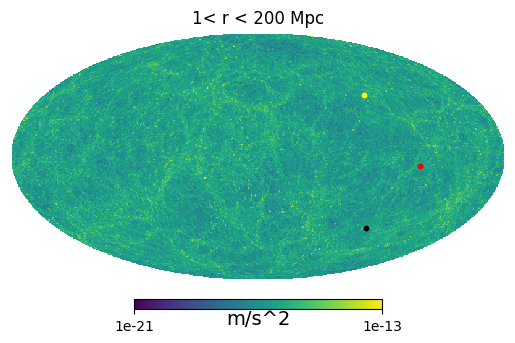

In [210]:
b_vel_obs=29*0.017
l_vel_obs=271*0.017
b_vel_sim=7*0.017
l_vel_sim=232*0.017
theta_vel_obs=np.pi/2.0-b_vel_obs
phi_vel_obs=l_vel_obs
theta_vel_sim=np.pi/2.0-b_vel_sim
phi_vel_sim=l_vel_sim
hp.mollview(counts2[15], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{}< r < {} Mpc".format(steps[0], steps[16])),unit='m/s^2', badcolor="white",hold=True)
hp.visufunc.projscatter(phi_vel_obs, theta_vel_obs, color='red', s=10)
hp.visufunc.projscatter(phi_vel_sim, theta_vel_sim, color='black', s=10)
hp.visufunc.projscatter(phi[15], theta[15], color='yellow', s=10)

In [ ]:
#check, it is interesting bit I get the same ratio for each 
for k in range(2):
    #print(mean_val2[k])
    print(mean_val2)
    print((np.arctan(np.sqrt(mean_val2[k][0]**2+mean_val2[k][1]**2))))
    print((mean_val2[k][2]/(np.sqrt(mean_val2[k][0]**2+mean_val2[k][1]**2))))
    

In [ ]:
# set the resolution of the skymap
nside = 64

# define the theta-phi coordinate of the point you want to plot
theta = 0.5  # in radians
phi = 1.2  # in radians

# convert theta-phi coordinates to pixel index
pixel_index = hp.ang2pix(Nside3, theta1, phi1)

# create a map of zeros with nside resolution
skymap = np.zeros(hp.nside2npix(nside))

# set the pixel corresponding to the point to 1
#skymap[pixel_index] = 1

# plot the skymap
hp.mollview(skymap)

# plot the point on the skymap
hp.visufunc.projscatter(phi1, theta1, s=20, c='red', marker='x')

print(theta1, phi1)
# show the plot
plt.show()

In [ ]:
|#Plotting mean acceleration 